In [26]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors
import requests
import itertools
import geopandas as gpd

from shapely.geometry import Point
import json

from io import StringIO
import os
import requests
import geopandas as gpd
from io import StringIO
from time import time


In [27]:
home = 'C:\\Users\\ck24\\OneDrive - University of Illinois - Urbana\\Documents\\geospatial_data_collection'

In [28]:
# Original dictionary
numeric_country_codes = {
    'Afghanistan': '004',
    'Bangladesh': '050',
    'Pakistan': '586',
    'Timor_Leste': '626',
    'Burundi': '108',
    'Central_African_Republic': '140',
    'Congo_DRC': '180',
    'Djibouti': '262',
    'Ethiopia': '231',
    'Kenya': '404',
    'Somalia': '706',
    'South_Sudan': '728',
    'Sudan': '729',
    'Tanzania': '834',
    'Uganda': '800',
    'Angola': '024',
    'Eswatini': '748',
    'Lesotho': '426',
    'Nigeria': '566',
    'Ethiopia': '231',
    'Madagascar': '450',
    'Malawi': '454',
    'Mozambique': '508',
    'Namibia': '516',
    'South_Africa': '710',
    'Zambia': '894',
    'Zimbabwe': '716',
    'Dominican_Republic': '214',
    'El_Salvador': '222',
    'Guatemala': '320',
    'Haiti': '332',
    'Honduras': '340',
    'Lebanon': '422',
    'Yemen': '887',
}

# Inverting the dictionary
code_to_country = {v: k for k, v in numeric_country_codes.items()}

# Now, if you have a list of sorted numeric codes and you want to print their corresponding country names
iso_num_code = sorted([code for code in numeric_country_codes.values() if code is not None])

# To find and print country names for each code
for code in iso_num_code:
    country = code_to_country[code]
    print(f"{code}: {country}")


004: Afghanistan
024: Angola
050: Bangladesh
108: Burundi
140: Central_African_Republic
180: Congo_DRC
214: Dominican_Republic
222: El_Salvador
231: Ethiopia
262: Djibouti
320: Guatemala
332: Haiti
340: Honduras
404: Kenya
422: Lebanon
426: Lesotho
450: Madagascar
454: Malawi
508: Mozambique
516: Namibia
566: Nigeria
586: Pakistan
626: Timor_Leste
706: Somalia
710: South_Africa
716: Zimbabwe
728: South_Sudan
729: Sudan
748: Eswatini
800: Uganda
834: Tanzania
887: Yemen
894: Zambia


# Retrieve ACLED data from API

In [29]:
#Skip

In [30]:
list_of_countries = sorted(['Madagascar', 'Haiti', 'Yemen', 'South_Sudan', 'Congo_DRC',
       'Afghanistan', 'Ethiopia', 'Central_African_Republic', 'Djibouti', 'Pakistan',
       'Mozambique', 'Lebanon', 'Kenya', 'Guatemala', 'Sudan','Nigeria','Malawi'])

list_of_countries

['Afghanistan',
 'Central_African_Republic',
 'Congo_DRC',
 'Djibouti',
 'Ethiopia',
 'Guatemala',
 'Haiti',
 'Kenya',
 'Lebanon',
 'Madagascar',
 'Malawi',
 'Mozambique',
 'Nigeria',
 'Pakistan',
 'South_Sudan',
 'Sudan',
 'Yemen']

In [31]:
iso_map = {
    'Afghanistan': 'AF',
    'Angola': 'AO',
    'Bangladesh': 'BD',
    'Burkina Faso': 'BF',
    'Burundi': 'BI',
    'Cambodia': 'KH',
    'Cameroon': 'CM',
    'Central African Republic': 'CF',
    'Chad': 'TD',
    'Djibouti': 'DJ',
    'Ecuador': 'EC',
    'El Salvador': 'SV',
    'Eswatini': 'SZ',
    'Ethiopia': 'ET',
    'Guatemala': 'GT',
    'Haiti': 'HT',
    'Honduras': 'HN',
    'Kenya': 'KE',
    'Lebanon': 'LB',
    'Lesotho': 'LS',
    'Madagascar': 'MG',
    'Malawi': 'MW',
    'Mali': 'ML',
    'Mozambique': 'MZ',
    'Namibia': 'NA',
    'Nepal': 'NP',
    'Niger': 'NE',
    'Nigeria': 'NG',
    'Pakistan': 'PK',
    'Philippines': 'PH',
    'Somalia': 'SO',
    'South Africa': 'ZA',
    'South Sudan': 'SS',
    'Sudan': 'SD',
    'Tajikistan': 'TJ',
    'Timor-Leste': 'TL',
    'Uganda': 'UG',
    'Tanzania': 'TZ',
    'Yemen': 'YE',
    'Zambia': 'ZM',
    'Zimbabwe': 'ZW',
    'Democratic Republic of the Congo': 'CD'  # newly added
}
reverse_iso_map = {v: k for k, v in iso_map.items()}

In [32]:
import os
import requests
import geopandas as gpd
from io import StringIO
from time import time
import glob
import pandas as pd
import seaborn as sns


# Download IPC GEOJSON

In [91]:
# Inputs
years = range(2017, 2025)

from dotenv import load_dotenv

# Load from .env
load_dotenv(dotenv_path=home+r"\ipc.env")

# Access the keys
key = os.getenv("ipc_key")

# Assuming home, iso_map, and key are already defined
base_path = os.path.join(home, 'stores', 'raw', 'ipc')
os.makedirs(base_path, exist_ok=True)

# Start total timer
total_start = time()

# Loop through each country and year
for cname, isocode in iso_map.items():
    for year in years:
        file_path = os.path.join(base_path, f"ipc_{isocode}_{year}.geojson")
        if os.path.exists(file_path):
            print(f"✔ File already exists: {file_path}")
            continue

        url = f"http://api.ipcinfo.org/areas?format=geojson&country={isocode}&year={year}&type=A&key={key}"

        # Timer for this loop
        loop_start = time()
        try:
            r = requests.get(url)
            if r.status_code == 200 and len(r.text) > 100:
                gdf = gpd.read_file(StringIO(r.text))
                gdf.to_file(file_path, driver='GeoJSON')
                print(f"✅ Saved: {file_path} ({round(time() - loop_start, 2)} sec)")
            else:
                print(f"⚠️ No data or failed request for {cname} {year} ({round(time() - loop_start, 2)} sec)")
        except Exception as e:
            print(f"❌ Error retrieving {cname} {year}: {e} ({round(time() - loop_start, 2)} sec)")

# End total timing
print(f"\n⏱️ Done in {round(time() - total_start, 2)} seconds.")

✅ Saved: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc\ipc_CD_2017.geojson (1.47 sec)
✅ Saved: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc\ipc_CD_2018.geojson (1.45 sec)
✅ Saved: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc\ipc_CD_2019.geojson (1.64 sec)
✅ Saved: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc\ipc_CD_2020.geojson (1.39 sec)
✅ Saved: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc\ipc_CD_2021.geojson (3.71 sec)
✅ Saved: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc\ipc_CD_2022.geojson (2.12 sec)
✅ Saved: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\sto

# Compile GEOJSON

In [94]:


compiled_path = os.path.join(home, 'stores', 'raw', 'ipc')
os.makedirs(compiled_path, exist_ok=True)

combine_df =[]

for cname, isocode in iso_map.items():
    # Find all geojson files for the country
    pattern = os.path.join(compiled_path, f"ipc_{isocode}_*.geojson")
    files = glob.glob(pattern)

    if not files:
        print(f"⚠️ No files found for {cname} – skipped.")
        continue

    # Read and concatenate
    gdf_list = [gpd.read_file(fp) for fp in files]
    country_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)
    
    print('Current Stauts #', len(country_gdf[country_gdf['ipc_period']=='C']))
    combine_df.append(country_gdf)
    
    # Optional: drop duplicates or sort by year if needed
    # country_gdf = country_gdf.drop_duplicates(subset=['anl_id'])

    # Save as GeoPackage (geometry preserved)
    #gpkg_path = os.path.join(compiled_path, f"ipc_{isocode}_2017_2024.gpkg")
    #country_gdf.to_file(gpkg_path, driver="GPKG")

    # Also save as Parquet without geometry for quick pandas use
    #pq_path = os.path.join(compiled_path, f"ipc_{isocode}_2017_2024.parquet")
    #country_gdf.drop(columns="geometry").to_parquet(pq_path, index=False)

    print(f"✅ Compiled {cname}: {len(country_gdf)}")


Current Stauts # 76
✅ Compiled Afghanistan: 583
Current Stauts # 0
✅ Compiled Angola: 40
Current Stauts # 0
✅ Compiled Bangladesh: 90
Current Stauts # 0
✅ Compiled Burkina Faso: 381
Current Stauts # 0
✅ Compiled Burundi: 112
⚠️ No files found for Cambodia – skipped.
Current Stauts # 0
✅ Compiled Cameroon: 452
Current Stauts # 49
✅ Compiled Central African Republic: 921
Current Stauts # 0
✅ Compiled Chad: 621
Current Stauts # 0
✅ Compiled Djibouti: 60
Current Stauts # 0
✅ Compiled Ecuador: 24
Current Stauts # 0
✅ Compiled El Salvador: 39
Current Stauts # 0
✅ Compiled Eswatini: 85
Current Stauts # 0
✅ Compiled Ethiopia: 278
Current Stauts # 5
✅ Compiled Guatemala: 183
Current Stauts # 22
✅ Compiled Haiti: 359
Current Stauts # 0
✅ Compiled Honduras: 110
Current Stauts # 0
✅ Compiled Kenya: 300
Current Stauts # 54
✅ Compiled Lebanon: 274
Current Stauts # 0
✅ Compiled Lesotho: 110
Current Stauts # 0
✅ Compiled Madagascar: 296
Current Stauts # 0
✅ Compiled Malawi: 332
Current Stauts # 0
✅ Co

# Save IPC GEOJSON

In [495]:
ipc_combined = pd.concat(combine_df)
ipc_combined['yearmon_start'] = pd.to_datetime(ipc_combined['from'], format="%b %Y").astype('str').str[:7]
ipc_combined['yearmon_end'] = pd.to_datetime(ipc_combined['to'], format="%b %Y").astype('str').str[:7]
ipc_combined[['yearmon_start','yearmon_end','country','geometry','title']]['country'].unique()
ipc_combined['country_name'] = ipc_combined['country'].map(reverse_iso_map)
ipc_combined['phase3plus'] = ipc_combined[['phase5_percent','phase4_percent','phase3_percent']].sum(axis = 1)
ipc_combined = ipc_combined[ipc_combined['overall_phase'].isin([1,2,3,4,5])]
ipc_combined.columns

Index(['id', 'estimated_population', 'population', 'ipc_period', 'from', 'to',
       'color', 'anl_id', 'title', 'overall_phase', 'country', 'year',
       'condition', 'phase3_worse_population', 'phase3_worse_percentage',
       'phase5_population', 'phase5_percent', 'phase5_color',
       'phase3_population', 'phase3_percent', 'phase3_color',
       'phase1_population', 'phase1_percent', 'phase1_color',
       'phase2_population', 'phase2_percent', 'phase2_color',
       'phase4_population', 'phase4_percent', 'phase4_color', 'geometry',
       'yearmon_start', 'yearmon_end', 'country_name', 'phase3plus'],
      dtype='object')

In [205]:
ipc_combined['analysis_id'] = ipc_combined['anl_id'].astype('int64')

In [206]:
geo_null_id = set(ipc_combined[ipc_combined['from'].isna()]['analysis_id'].unique())
print(len(geo_null_id))
geo_null_id

31


{12184859,
 12939387,
 12960452,
 14042630,
 14140379,
 15169027,
 15803011,
 18168549,
 19191589,
 21317714,
 23027199,
 23886697,
 24586740,
 24665020,
 24967258,
 24988845,
 25219305,
 25802297,
 26698157,
 37109570,
 56653189,
 64768802,
 64985227,
 65196098,
 65508276,
 68621305,
 68744070,
 72163867,
 74795267,
 75572968,
 75657420}

In [224]:
ipc_combined[ipc_combined['from'].isna()].groupby(['analysis_id'])['unique_name'].value_counts().sort_values(ascending = False)

analysis_id  unique_name                         
26698157     Yemen_NaT                               331
64768802     Sudan_NaT                               187
56653189     Democratic Republic of the Congo_NaT    185
19191589     Sudan_NaT                               184
74795267     Sudan_NaT                               151
64985227     Yemen_NaT                               118
75572968     Mozambique_NaT                          116
14140379     South Sudan_NaT                          78
65196098     Niger_NaT                                78
24988845     Central African Republic_NaT             76
23886697     Central African Republic_NaT             74
68621305     Central African Republic_NaT             72
15803011     Central African Republic_NaT             64
23027199     Zambia_NaT                               64
68744070     Lebanon_NaT                              59
24967258     Mali_NaT                                 51
72163867     Bangladesh_NaT           

In [244]:
geo_df = ipc_combined[ipc_combined['from'].isna()].groupby(['analysis_id'])['unique_name'].value_counts().sort_values(ascending = False).reset_index(name='count_geo').rename(columns = {'unique_name':'name'})

pop_df = ipc_population[ipc_population['analysis_id'].isin(geo_null_id)].groupby(['analysis_id'])['unique_name'].value_counts().sort_values(ascending = False).reset_index(name='count_pop')


In [267]:
merge_df = geo_df.merge(pop_df, on = 'analysis_id',how='left')
merge_df['count_diff'] = merge_df['count_geo'] - merge_df['count_pop']
merge_df['yearmon'] = merge_df['unique_name'].str[-7:]

In [269]:
mapping_name = dict(zip(merge_df['analysis_id'], merge_df['unique_name']))
mapping_year = dict(zip(merge_df['analysis_id'], merge_df['yearmon']))
mapping_name

{26698157: 'Yemen_2022-08',
 64768802: 'Sudan_2023-10',
 56653189: 'Democratic Republic of the Congo_2023-04',
 19191589: 'Sudan_2020-10',
 74795267: 'Sudan_2024-10',
 64985227: 'Yemen_2023-10',
 75572968: 'Mozambique_2024-10',
 14140379: 'South Sudan_2019-05',
 65196098: 'Niger_2024-03',
 24988845: 'Central African Republic_2022-03',
 23886697: 'Central African Republic_2021-02',
 68621305: 'Central African Republic_2024-04',
 15803011: 'Central African Republic_2020-04',
 23027199: 'Zambia_2021-02',
 68744070: 'Lebanon_2024-03',
 24967258: 'Mali_2022-03',
 72163867: 'Bangladesh_2024-10',
 65508276: 'Haiti_2024-03',
 24665020: 'Haiti_2022-02',
 37109570: 'Haiti_2023-03',
 14042630: 'Malawi_2019-11',
 25802297: 'Kenya_2022-04',
 21317714: 'Guatemala_2020-12',
 12184859: 'Yemen_2017-03',
 25219305: nan,
 18168549: 'Honduras_2020-06',
 24586740: 'Eswatini_2021-11',
 12960452: 'Lesotho_2018-11',
 75657420: 'Lesotho_2024-12',
 15169027: 'Madagascar_2020-03',
 12939387: 'Eswatini_2018-11'}

In [283]:
ipc_combined['unique_name'] = ipc_combined['analysis_id'].map(mapping_name).fillna(ipc_combined['unique_name'])
ipc_combined['yearmon'] = ipc_combined['analysis_id'].map(mapping_year).fillna(ipc_combined['yearmon_start'])
ipc_combined[ipc_combined['yearmon']=="NaT"]['unique_name'].unique()

array(['Somalia_NaT'], dtype=object)

In [293]:
ipc_combined[ipc_combined['analysis_id'].isin([12511433, 12693302])]

id  estimated_population  population ipc_period      from  \
12250  12693417                 37781    12327530          P  Jan 2017   
12251  12693415                238655    12327530          P  Jan 2017   
12252  12693379                172485    12327530          P  Jan 2017   
12253  12693361                177384    12327530          P  Jan 2017   
12254  12693312                 56178    12327530          P  Jan 2017   
...         ...                   ...         ...        ...       ...   
12391  12511482                 83610    12327530          P  Jul 2017   
12392  12511573                109870    12327530          P  Jul 2017   
12393  12511498                144407    12327530          P  Jul 2017   
12394  12511528                179097    12327530          P  Jul 2017   
12395  12511440                 51961    12327530          P  Jul 2017   

             to    color    anl_id          title  overall_phase  ...  \
12250  Jan 2017  #e67800  12693302    Adan yabaal              2  ...   
12251  Jan 2017  #e67800  12693302        Afgooye              2  ...   
12252  Jan 2017  #e67800  12693302        Afmadow              2  ...   
12253  Jan 2017  #e67800  12693302     Baardheere              2  ...   
12254  Jan 2017  #e67800  12693302      Badhaadhe              2  ...   
...         ...      ...       ...            ...            ...  ...   
12391  Jul 2017  #e67800  12511433      Ceel buur              2  ...   
12392  Jul 2017  #e67800  12511433     Ceel dheer              2  ...   
12393  Jul 2017  #c80000  12511433  Dhuusamarreeb              3  ...   
12394  Jul 2017  #fae61e  12511433         Jowhar              1  ...   
12395  Jul 2017  #e67800  12511433    Xarardheere              2  ...   

      phase4_percent  phase4_color yearmon_start  yearmon_end  country_name  \
12250            NaN          None       2017-01      2017-01       Somalia   
12251            NaN          None       2017-01      2017-01       Somalia   
12252            NaN          None       2017-01      2017-01       Somalia   
12253            NaN          None       2017-01      2017-01       Somalia   
12254            NaN          None       2017-01      2017-01       Somalia   
...              ...           ...           ...          ...           ...   
12391           0.00       #640000       2017-07      2017-07       Somalia   
12392           0.00       #640000       2017-07      2017-07       Somalia   
12393           0.01       #640000       2017-07      2017-07       Somalia   
12394           0.00       #640000       2017-07      2017-07       Somalia   
12395           0.00       #640000       2017-07      2017-07       Somalia   

       phase3plus                                           geometry  \
12250        0.13  POLYGON ((47.03762 3.47259, 47.00525 3.44140, ...   
12251        0.11  POLYGON ((45.24383 1.97357, 45.23703 1.97055, ...   
12252        0.13  POLYGON ((42.70220 0.29998, 42.54091 0.11184, ...   
12253        0.17  POLYGON ((42.04700 1.94701, 41.64089 1.94167, ...   
12254        0.18  MULTIPOLYGON (((41.91983 -1.15960, 41.91728 -1...   
...           ...                                                ...   
12391        0.13  POLYGON ((46.37450 4.25265, 46.15099 4.43144, ...   
12392        0.09  POLYGON ((47.83458 4.33300, 47.82794 4.32596, ...   
12393        0.21  POLYGON ((46.34744 5.10393, 46.22983 5.07325, ...   
12394        0.02  POLYGON ((45.44995 2.75905, 45.33366 2.73222, ...   
12395        0.00  POLYGON ((48.29570 5.02894, 48.25840 4.97573, ...   

           unique_name  analysis_id  yearmon  
12250  Somalia_2017-01     12693302  2017-01  
12251  Somalia_2017-01     12693302  2017-01  
12252  Somalia_2017-01     12693302  2017-01  
12253  Somalia_2017-01     12693302  2017-01  
12254  Somalia_2017-01     12693302  2017-01  
...                ...          ...      ...  
12391  Somalia_2017-07     12511433  2017-07  
12392  Somalia_2017-07     12511433  2017-07  
12393  Som

In [295]:
# We are missing March 2022 Projection Update 
ipc_combined[ipc_combined['country_name']=='Somalia'].groupby('analysis_id')['unique_name'].unique()

analysis_id
12511433    [Somalia_2017-07]
12524105    [Somalia_2018-01]
12693302    [Somalia_2017-01]
12836822    [Somalia_2018-07]
13052452    [Somalia_2019-01]
14117796    [Somalia_2019-07]
14119557    [Somalia_2020-01]
18976784    [Somalia_2020-07]
22458384    [Somalia_2021-01]
24607466    [Somalia_2021-07]
24755659    [Somalia_2022-01]
25219305        [Somalia_NaT]
25817951    [Somalia_2022-05]
26601265    [Somalia_2022-07]
26777665    [Somalia_2022-10]
33607389    [Somalia_2023-01]
54775925    [Somalia_2023-03]
59090932    [Somalia_2023-08]
65024769    [Somalia_2024-01]
69455744    [Somalia_2024-07]
Name: unique_name, dtype: object

In [297]:
ipc_combined = ipc_combined.to_crs(epsg=3857)  # Web Mercator
ipc_combined['area_m2'] = ipc_combined.geometry.area
ipc_combined['area_km2'] = ipc_combined['area_m2'] / 1e6

In [290]:
ipc_combined[['id','estimated_population','from','to','color','analysis_id','title','unique_name','yearmon','geometry']]

id  estimated_population      from        to    color  \
0      12166893                983277  Aug 2017  Nov 2017  #c80000   
1      12166947                979178  Aug 2017  Nov 2017  #e67800   
2      12166938                513930  Aug 2017  Nov 2017  #640000   
3      12166899               1392089  Aug 2017  Nov 2017  #e67800   
4      12166980                462954  Aug 2017  Nov 2017  #c80000   
...         ...                   ...       ...       ...      ...   
22199  72110698                385896  Sep 2024  Dec 2024  #c80000   
22200  72110474                181881  Sep 2024  Dec 2024  #e67800   
22201  72110694                392292  Sep 2024  Dec 2024  #c80000   
22202  72110540                167475  Sep 2024  Dec 2024  #c80000   
22203  72110706                 93957  Sep 2024  Dec 2024  #c80000   

       analysis_id       title                               unique_name  \
0         12166890  Badakhshan                       Afghanistan_2017-08   
1         12166890     Baghlan                       Afghanistan_2017-08   
2         12166890     Badghis                       Afghanistan_2017-08   
3         12166890       Balkh                       Afghanistan_2017-08   
4         12166890      Bamyan                       Afghanistan_2017-08   
...            ...         ...                                       ...   
22199     72110264       Watsa  Democratic Republic of the Congo_2024-09   
22200     72110264      Yahuma  Democratic Republic of the Congo_2024-09   
22201     72110264      Yakoma  Democratic Republic of the Congo_2024-09   
22202     72110264       Yumbi  Democratic Republic of the Congo_2024-09   
22203     72110264       Zongo  Democratic Republic of the Congo_2024-09   

       yearmon                                           geometry  
0      2017-08  POLYGON ((71.19484 36.03904, 71.18801 36.03845...  
1      2017-08  POLYGON ((69.23461 36.32468, 69.22877 36.31975...  
2      2017-08  POLYGON ((63.91477 35.86124, 63.90172 35.84400...  
3      2017-08  POLYGON ((67.00864 37.37525, 67.01086 37.37364...  
4      2017-08  POLYGON ((67.81901 35.47557, 67.82575 35.47926...  
...        ...                                                ...  
22199  2024-09  POLYGON ((29.34812 3.38355, 29.35391 3.37855, ...  
22200  2024-09  POLYGON ((22.68087 2.04996, 22.68159 2.04444, ...  
22201  2024-09  POLYGON ((22.44522 4.12434, 22.46292 4.11710, ...  
22202  2024-09  POLYGON ((16.63702 -1.99824, 16.63978 -2.00187...  
22203  2024-09  POLYGON ((18.65200 3.97800, 18.65200 4.00900, ...  

[22204 rows x 10 columns]

C:\Users\ck24\.conda\envs\master\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\ck24\.conda\envs\master\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\ck24\.conda\envs\master\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\ck24\.conda\envs\master\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\ck24\.conda\envs\master\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\ck24\.conda\envs\master\lib\site-packages

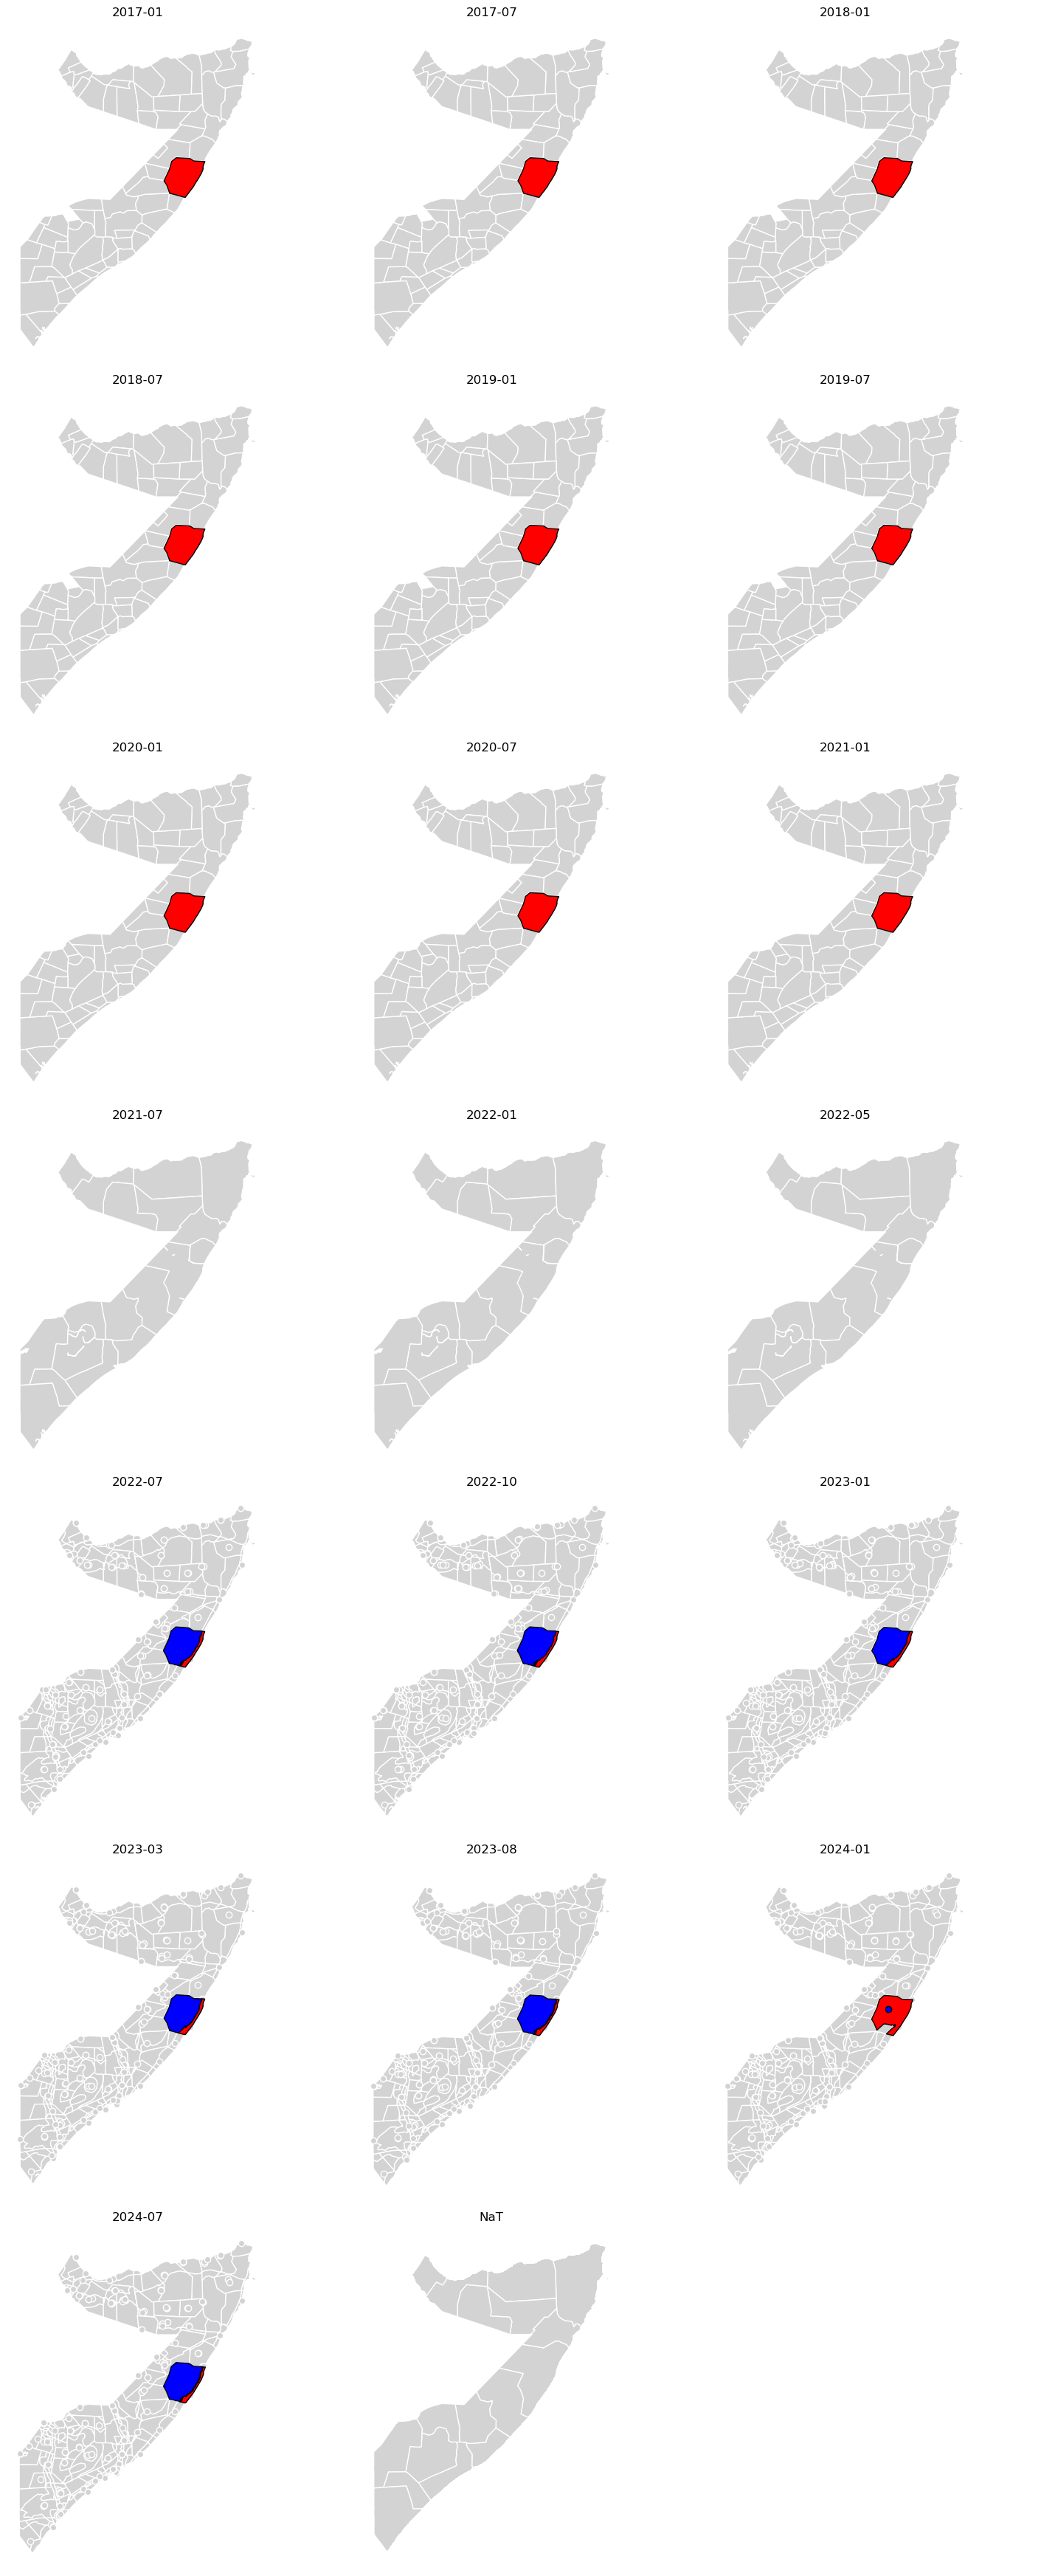

In [336]:
import matplotlib.pyplot as plt
import math

som_df = ipc_combined[ipc_combined['country_name'] == 'Somalia']
years = sorted(som_df['yearmon'].unique())

# Grid setup: 3 columns, enough rows to fit all years
ncols = 3
nrows = math.ceil(len(years) / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
axes = axes.flatten()  # flatten to 1D list for easy looping

for ax, year in zip(axes, years):
    gdf_year = som_df[som_df['yearmon'] == year]

    # Plot everything in grey
    gdf_year.plot(ax=ax, color="lightgrey", edgecolor="white")

    # Overlay Hobyo in red
    gdf_year[gdf_year['title'] == "Hobyo"].plot(ax=ax, color="red", edgecolor="black")
    gdf_year[gdf_year['title'] == "Hobyo (1)"].plot(ax=ax, color="blue", edgecolor="black")

    ax.set_title(str(year))
    ax.axis("off")

# Hide any unused subplots (if years not multiple of 3)
for ax in axes[len(years):]:
    ax.axis("off")

plt.tight_layout()
plt.show()


In [332]:
ipc_combined[ipc_combined['title']=='Hobyo (1)'].groupby('yearmon')['area_km2'].mean()

yearmon
2022-07    23696.314839
2022-10    23696.314839
2023-01    22567.051395
2023-03    22567.051395
2023-08    23670.573383
2024-01        0.000000
2024-07    23670.573383
Name: area_km2, dtype: float64

In [337]:
ipc_combined.groupby(['country_name'])['title'].value_counts().sort_index()

country_name  title               
Afghanistan   Badakhshan              13
              Badghis                 13
              Baghlan                 13
              Baghlan Urban            9
              Balkh                   13
                                      ..
Zimbabwe      Umzingwane               4
              Uzumbamarambapfungwe     4
              Zaka                     4
              Zvimba                   4
              Zvishavane               4
Name: title, Length: 4228, dtype: int64

In [305]:
ipc_combined.groupby(['country_name','title'])['area_m2'].mean().to_clipboard()

In [292]:
# OR save as GeoJSON
ipc_combined.to_file(os.path.join(home, 'stores', 'processed', 'ipc_geo_df.geojson'), driver='GeoJSON')

In [340]:
os.path.join(home, 'stores', 'processed', 'ipc_geo_df.geojson')

'C:\\Users\\ck24\\OneDrive - University of Illinois - Urbana\\Documents\\geospatial_data_collection\\stores\\processed\\ipc_geo_df.geojson'

In [339]:
# OR save as GeoJSON
ipc_combined[['id','estimated_population','from','to','color','analysis_id','title','unique_name','yearmon','geometry','area_km2']].to_file(os.path.join(home, 'stores', 'processed', 'ipc_geo_df2.geojson'), driver='GeoJSON')



# Load IPC GeoJSON

In [175]:
ipc_combined.groupby('country_name')['yearmon_start'].unique()

country_name
Afghanistan                         [2017-08, 2017-05, 2018-08, 2017-11, 2019-08, ...
Angola                                                             [2019-07, 2021-06]
Bangladesh                                                    [2023-03, NaT, 2024-02]
Burkina Faso                        [2020-10, 2021-10, 2021-03, 2022-10, 2022-03, ...
Burundi                             [2017-07, 2017-04, 2018-07, 2018-03, 2020-08, ...
Cameroon                            [2020-10, 2021-10, 2021-03, 2022-10, 2022-03, ...
Central African Republic            [2017-02, 2018-08, 2018-03, 2019-09, 2019-05, ...
Chad                                [2020-10, 2021-10, 2021-03, 2022-10, 2022-03, ...
Democratic Republic of the Congo    [2017-06, 2018-08, 2019-07, 2020-07, 2021-09, ...
Djibouti                                         [2020-10, 2022-03, 2023-03, 2024-04]
Ecuador                                                                     [2024-06]
El Salvador                              

In [ ]:
ipc_combined = gpd.read_file(home +r'\\stores\\processed\\ipc_geo_df.geojson')

# Simple Analysis

<AxesSubplot:xlabel='phase3plus', ylabel='Count'>

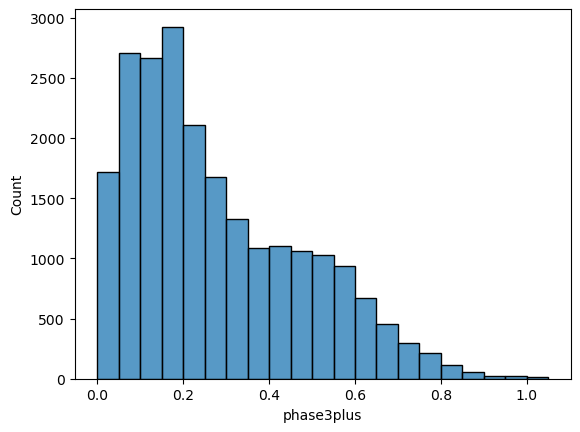

In [112]:
#ipc_combined = pd.concat(combine_df)
#ipc_combined = ipc_combined[ipc_combined['ipc_period']=='C']
ipc_combined['phase3plus'] = ipc_combined[['phase5_percent','phase4_percent','phase3_percent']].sum(axis = 1)
ipc_combined = ipc_combined[ipc_combined['overall_phase'].isin([1,2,3,4,5])]
sns.histplot(ipc_combined['phase3plus'], binwidth = 0.04999)

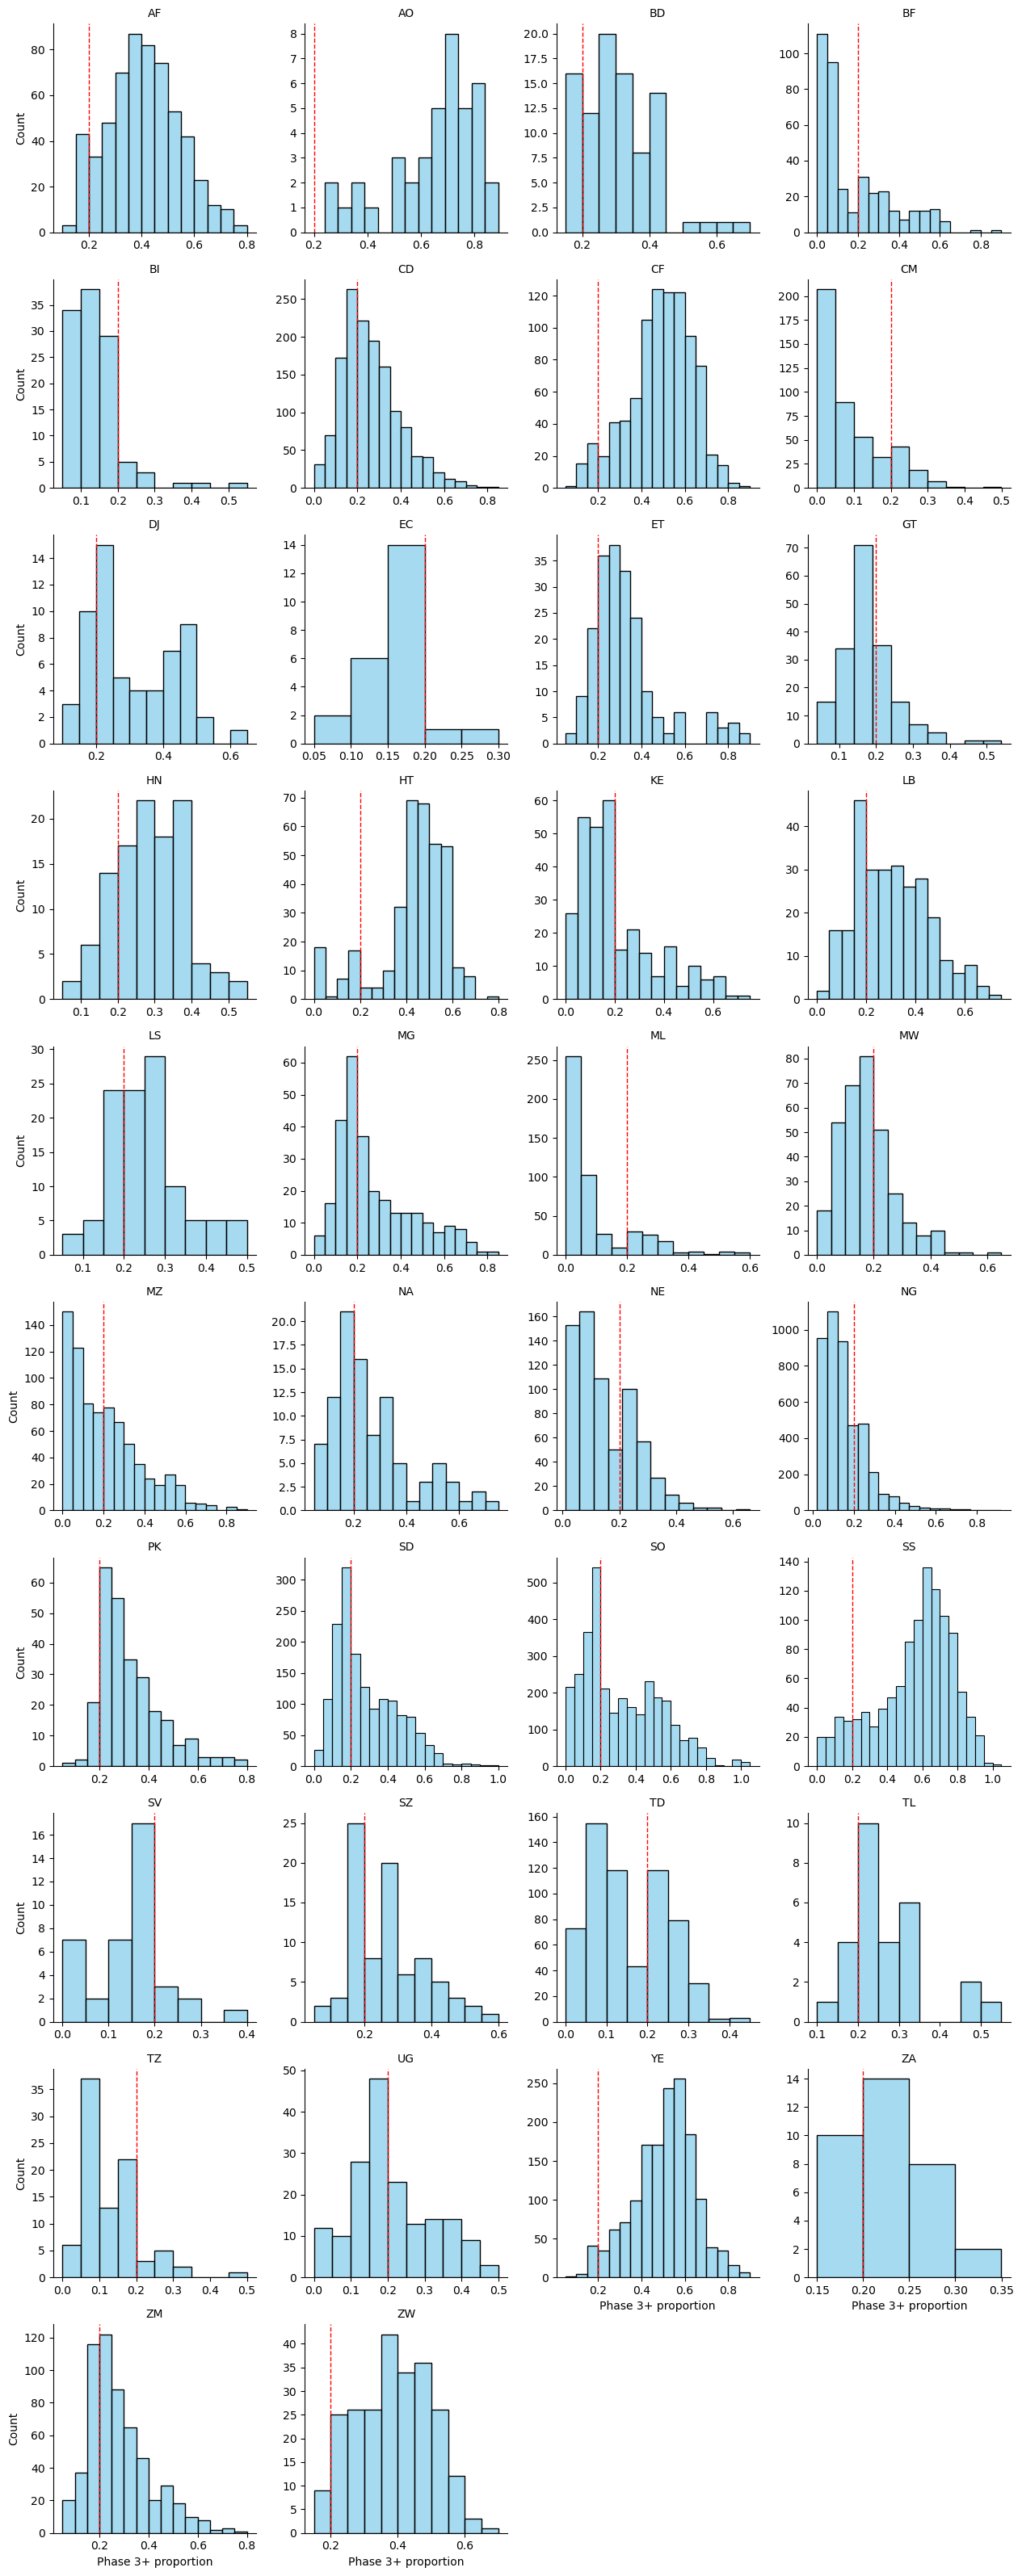

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'country' is categorical
ipc_combined['country'] = ipc_combined['country'].astype('category')

# Custom function without color specified
def hist_with_vline(data, **kwargs):
    sns.histplot(data["phase3plus"], binwidth=0.04999, edgecolor="black", **kwargs)
    plt.axvline(x=0.2, color='red', linestyle='--', linewidth=1)

# Set up FacetGrid
g = sns.FacetGrid(
    ipc_combined,
    col="country",
    col_wrap=4,
    height=3.2,
    sharex=False,
    sharey=False
)

# Apply function with external color setting
g.map_dataframe(hist_with_vline, color="skyblue")

# Add labels and tidy up
g.set_axis_labels("Phase 3+ proportion", "Count")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()


In [115]:
# Ensure 'to' is datetime and 'country' is categorical
ipc_combined['to'] = pd.to_datetime(ipc_combined['to'], errors='coerce')
ipc_combined['from'] = pd.to_datetime(ipc_combined['from'], errors='coerce')

ipc_combined['phase3plus_rounded'] = (ipc_combined['phase3_worse_percentage'] * 20).round() / 20
ipc_combined[(ipc_combined['from']>='2020-01-01')&
             (ipc_combined['from']<='2020-05-01')&
            (ipc_combined['country']=='AF')][['phase3plus','ipc_period']].value_counts().sort_index()

phase3plus  ipc_period
0.15        P             3
0.20        P             3
0.25        P             6
0.30        P             1
            P             8
0.35        P             8
0.40        P             8
0.45        P             3
0.55        P             5
dtype: int64

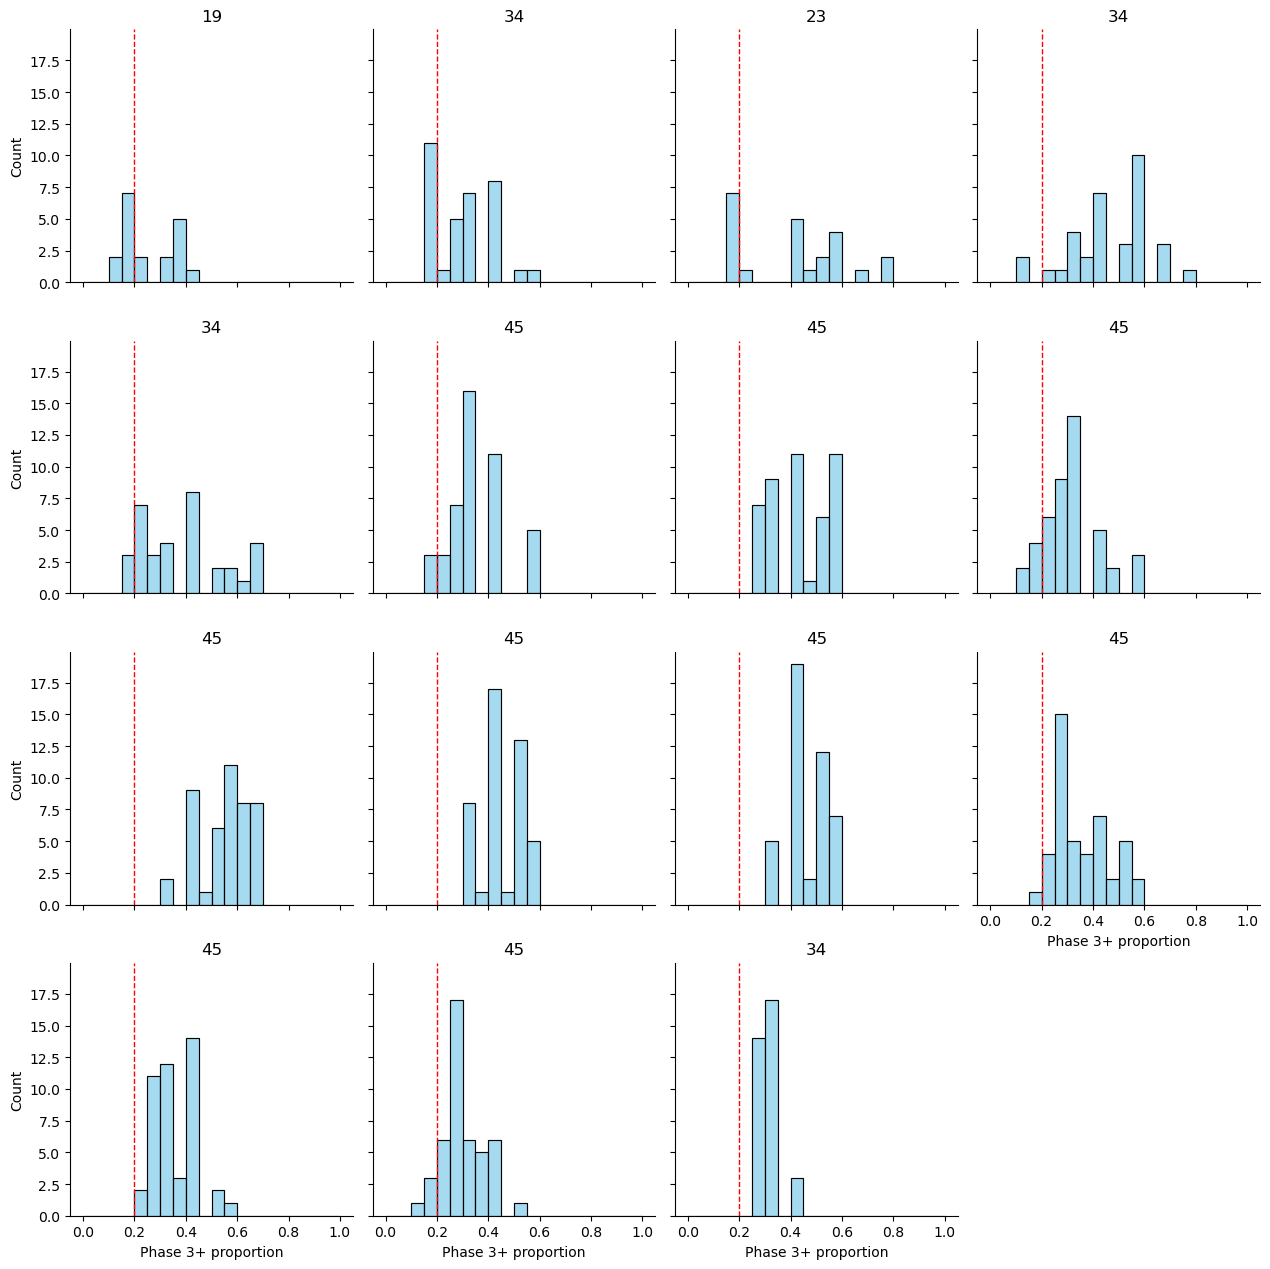

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Ensure 'country' is categorical
# Convert 'to' column to datetime if needed
ipc_combined['phase3plus_rounded'] = (ipc_combined['phase3plus'] * 20).round() / 20

# Ensure 'to' is datetime and 'country' is categorical
ipc_combined['to'] = pd.to_datetime(ipc_combined['to'], errors='coerce')
ipc_combined['country'] = ipc_combined['country'].astype('category')

# Filter for one country (example: Afghanistan)
plot_df = ipc_combined[ipc_combined['country'] == 'AF']

# Sort chronologically by 'to'
plot_df = plot_df.sort_values('to')

# Define bin edges: 0 to 1 by 0.05 (5% interval)
bin_edges = np.arange(0, 1.05, 0.05)

# Define custom plotting function
def hist_with_vline(data, **kwargs):
    sns.histplot(data["phase3plus"], bins=bin_edges, edgecolor="black", color="skyblue")
    plt.axvline(x=0.2, color='red', linestyle='--', linewidth=1)
    plt.title(len(data))

# Create FacetGrid
g = sns.FacetGrid(
    plot_df,
    col="to",
    col_wrap=4,
    height=3.2,
    sharex=True,   # consistent x-axis
    sharey=True    # consistent y-axis
)

# Map histogram with vertical line
g.map_dataframe(hist_with_vline)

# Format titles with date and n
#g.set_titles(template="{col_name:%Y-%m-%d}\nn = {col_var.size}")

# Label axes
g.set_axis_labels("Phase 3+ proportion", "Count")
plt.tight_layout()
plt.show()



In [117]:
# Drop rows with missing title
df_cleaned = ipc_combined.dropna(subset=['title'])

# Convert 'to' column to datetime if needed
df_cleaned['to'] = pd.to_datetime(df_cleaned['to'], errors='coerce')

# Drop rows with invalid date parsing
df_cleaned = df_cleaned.dropna(subset=['to'])

# Sort by date in descending order
df_cleaned = df_cleaned.sort_values(by='to', ascending=False)

# Drop duplicates keeping the latest entry per title (or region/country as needed)
df_latest = df_cleaned.drop_duplicates(subset=['title'], keep='first')

C:\Users\ck24\.conda\envs\master\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


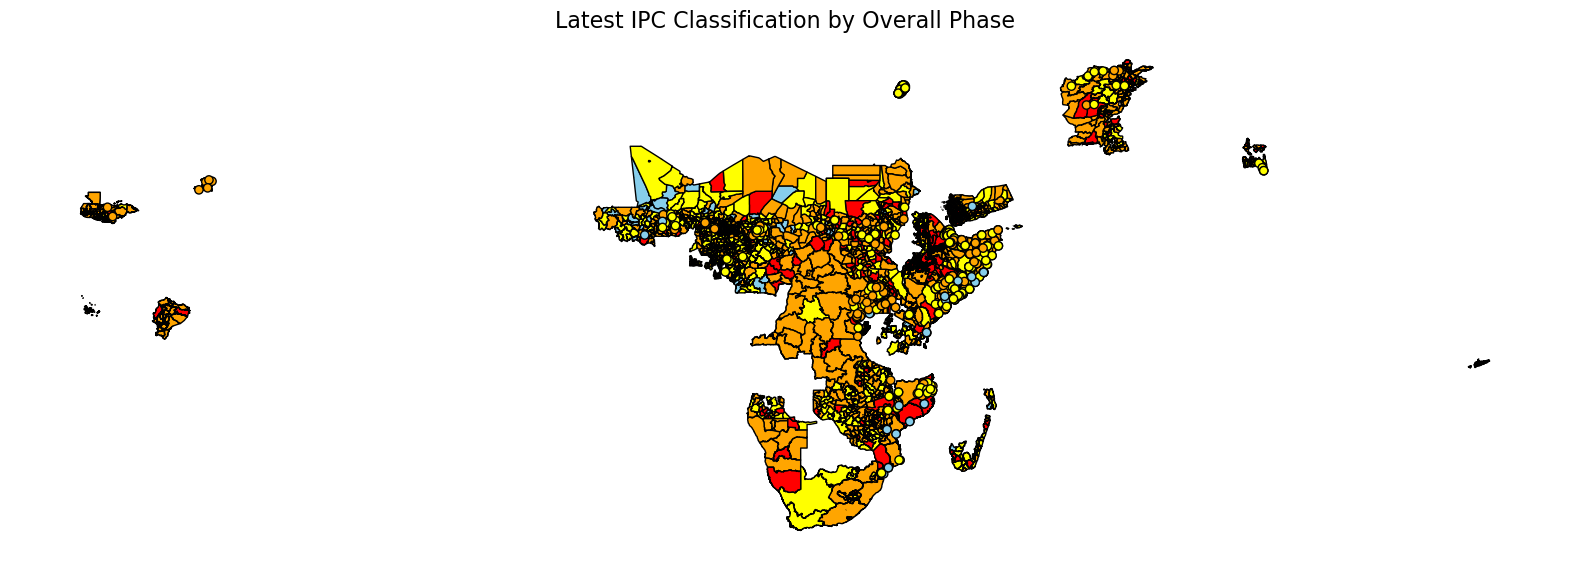

In [118]:
# Define color map
color_map = {
    1: 'skyblue',
    2: 'yellow',
    3: 'orange',
    4: 'red',
    5: 'darkred'
}

# Map colors to a new column based on 'overall_phase'
df_latest['color'] = df_latest['overall_phase'].map(color_map)

# Plot using the assigned colors
fig, ax = plt.subplots(figsize=(20, 10))
df_latest.plot(ax=ax, color=df_latest['color'], edgecolor='black')

# Add title and clean axes
ax.set_title('Latest IPC Classification by Overall Phase', fontsize=16)
ax.axis('off')

plt.show()

# Download IPC Population Estimates

In [133]:
# Input
years = range(2016, 2025)  # Adjust as needed
base_path = os.path.join(home, 'stores', 'raw', 'ipc_population')
os.makedirs(base_path, exist_ok=True)

# Start timer
total_start = time()

# Loop through each country and year
for cname, isocode in iso_map.items():
    for year in years:
        file_path = os.path.join(base_path, f"ipc_population_{isocode}_{year}.json")
        if os.path.exists(file_path):
            print(f"✔ File already exists: {file_path}")
            continue

        url = f"https://api.ipcinfo.org/population?country={isocode}&start={year}&end={year}&key={key}"

        loop_start = time()
        try:
            r = requests.get(url)
            if r.status_code == 200 and len(r.text) > 100:
                with open(file_path, 'w', encoding='utf-8') as f:
                    json.dump(r.json(), f, indent=2)
                print(f"✅ Saved: {file_path} ({round(time() - loop_start, 2)} sec)")
            else:
                print(f"⚠️ No data or failed request for {cname} {year} ({round(time() - loop_start, 2)} sec)")
        except Exception as e:
            print(f"❌ Error retrieving {cname} {year}: {e} ({round(time() - loop_start, 2)} sec)")

# End timer
print(f"\n⏱️ Done in {round(time() - total_start, 2)} seconds.")


⚠️ No data or failed request for Afghanistan 2016 (0.38 sec)
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_AF_2017.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_AF_2018.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_AF_2019.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_AF_2020.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_AF_2021.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Docu

⚠️ No data or failed request for Chad 2016 (0.39 sec)
⚠️ No data or failed request for Chad 2017 (0.29 sec)
⚠️ No data or failed request for Chad 2018 (0.27 sec)
⚠️ No data or failed request for Chad 2019 (0.28 sec)
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_TD_2020.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_TD_2021.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_TD_2022.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_TD_2023.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial

⚠️ No data or failed request for Honduras 2016 (0.29 sec)
⚠️ No data or failed request for Honduras 2017 (0.29 sec)
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_HN_2018.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_HN_2019.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_HN_2020.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_HN_2021.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_HN_2022.json
✔ File already exists: C:\Use

⚠️ No data or failed request for Mozambique 2016 (0.29 sec)
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_MZ_2017.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_MZ_2018.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_MZ_2019.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_MZ_2020.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_MZ_2021.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Docum

⚠️ No data or failed request for South Africa 2016 (0.33 sec)
⚠️ No data or failed request for South Africa 2017 (0.3 sec)
⚠️ No data or failed request for South Africa 2018 (0.34 sec)
⚠️ No data or failed request for South Africa 2019 (0.3 sec)
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_ZA_2020.json
⚠️ No data or failed request for South Africa 2021 (0.26 sec)
⚠️ No data or failed request for South Africa 2022 (0.27 sec)
⚠️ No data or failed request for South Africa 2023 (0.32 sec)
⚠️ No data or failed request for South Africa 2024 (0.29 sec)
⚠️ No data or failed request for South Sudan 2016 (0.34 sec)
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_SS_2017.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_da

⚠️ No data or failed request for Zambia 2016 (0.3 sec)
⚠️ No data or failed request for Zambia 2017 (0.33 sec)
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_ZM_2018.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_ZM_2019.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_ZM_2020.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_ZM_2021.json
✔ File already exists: C:\Users\ck24\OneDrive - University of Illinois - Urbana\Documents\geospatial_data_collection\stores\raw\ipc_population\ipc_population_ZM_2022.json
✔ File already exists: C:\Users\ck

# Load and Save IPC Classification & Pop Estimates - AFI Only

In [221]:

# Define base path
base_path = os.path.join(home, 'stores', 'raw', 'ipc_population')

# Initialize list to collect flattened records
all_flat_records = []

# Loop through all JSON files in the folder
for file in os.listdir(base_path):
    if file.endswith('.json'):
        file_path = os.path.join(base_path, file)
        with open(file_path, 'r', encoding='utf-8') as f:
            try:
                data = json.load(f)

                # Ensure list of entries
                if not isinstance(data, list):
                    data = [data]

                for entry in data:
                    general_info = {
                        'analysis_id': entry.get('id'),
                        'title': entry.get('title'),
                        'country': entry.get('country'),
                        'ipc_period': entry.get('ipc_period'),
                        'condition': entry.get('condition'),
                        'analysis_date': entry.get('analysis_date'),
                        'current_period_dates': entry.get('current_period_dates'),
                        'projected_period_dates': entry.get('projected_period_dates'),
                        'second_projected_period_dates': entry.get('second_projected_period_dates')
                    }

                    # Case 1: areas directly under entry
                    for area in entry.get('areas', []):
                        combined = {**general_info, **area}
                        all_flat_records.append(combined)

                    # Case 2: areas under groups
                    for group in entry.get('groups', []):
                        for area in group.get('areas', []):
                            combined = {**general_info, **area}
                            all_flat_records.append(combined)

            except Exception as e:
                print(f"Failed to load {file}: {e}")

# Convert to DataFrame
ipc_population = pd.DataFrame(all_flat_records)

# Filter only Acute IPC periods
ipc_population = ipc_population[ipc_population['ipc_period'] == 'A']

# Preview
print(f"Loaded and flattened: {ipc_population.shape[0]} rows")
ipc_population[['title', 'name', 'overall_phase', 'p3plus']].head()


Failed to load ipc_population_GT_2018.json: 'NoneType' object is not iterable
Failed to load ipc_population_HN_2018.json: 'NoneType' object is not iterable
Failed to load ipc_population_SZ_2019.json: 'NoneType' object is not iterable
Failed to load ipc_population_TL_2018.json: 'NoneType' object is not iterable
Loaded and flattened: 22648 rows


title        name  overall_phase    p3plus
0  Acute Food Insecurity August 2017  Badakhshan            3.0  344147.0
1  Acute Food Insecurity August 2017   Nangarhar            3.0  553482.0
2  Acute Food Insecurity August 2017       Balkh            2.0  250576.0
3  Acute Food Insecurity August 2017     Hilmand            3.0  249909.0
4  Acute Food Insecurity August 2017       Khost            3.0  227112.0

In [476]:
#Save
ipc_population.to_csv(home +r'\\stores\\processed\\ipc_population.csv')

# Combine GEOSON with  IPC AFI Current + Projections

In [39]:
# Load IPC Geojson
ipc_combined = gpd.read_file(home +r'\\stores\\processed\\ipc_geo_df.geojson')

In [40]:
ipc_combined['unique_name'] = ipc_combined['country_name'] + '_' + ipc_combined['yearmon_start'].astype(str)
ipc_combined_sub = ipc_combined[['yearmon_start','yearmon_end','title','geometry','unique_name','anl_id','country_name']].rename(columns = {'title':'district','anl_id':'analysis_id'})
ipc_combined_sub['analysis_id'] = ipc_combined_sub['analysis_id'].astype('int64')

Nigeria_2024-10                             560
Somalia_2024-07                             355
Democratic Republic of the Congo_2024-09    208
Sudan_2024-04                               150
Yemen_2024-07                               118
Zambia_2024-07                               94
Central African Republic_2024-09             84
South Sudan_2024-09                          80
Niger_2024-10                                78
Mozambique_2024-04                           74
Chad_2024-10                                 69
Pakistan_2024-11                             68
Zimbabwe_2020-10                             60
Cameroon_2024-10                             58
Mali_2024-10                                 56
Lebanon_2024-10                              47
Burkina Faso_2024-03                         45
Ethiopia_2021-05                             43
Madagascar_2024-09                           36
Haiti_2024-08                                35
South Africa_2020-09                    

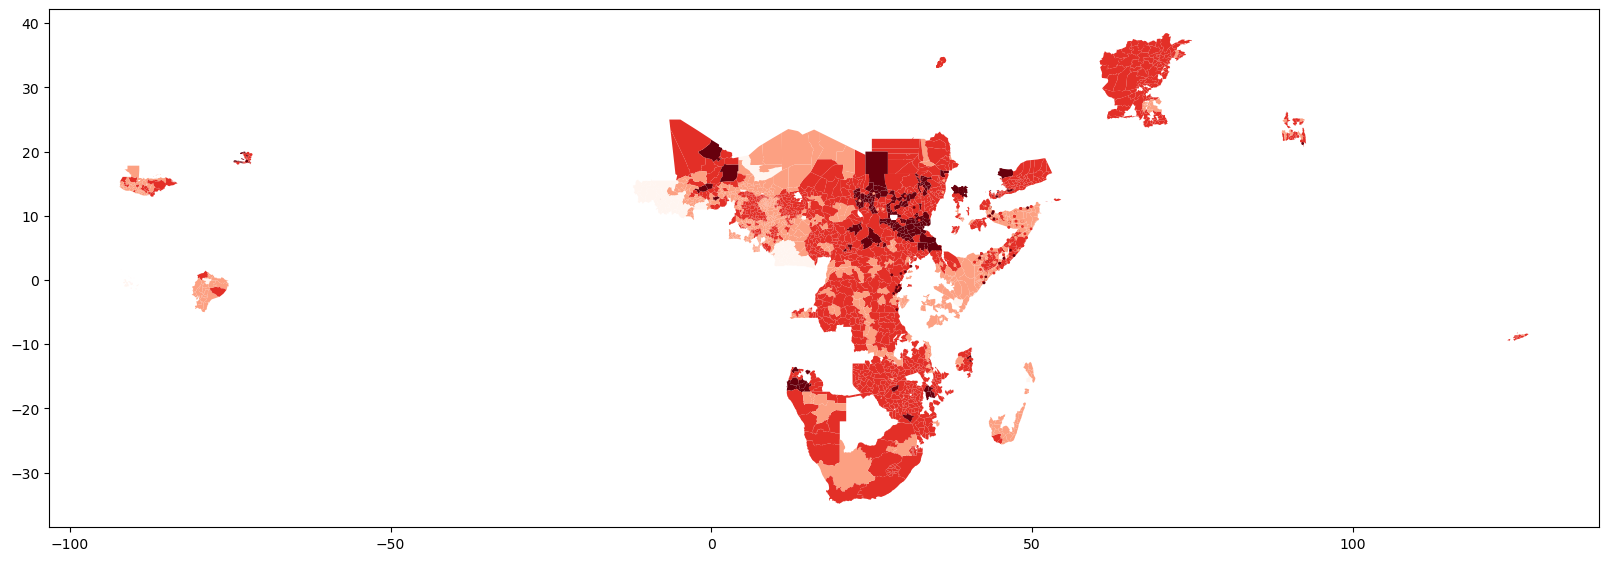

In [43]:
# Latest Assessments from Each Country
latest_analysis = sorted(ipc_combined[ipc_combined['yearmon_start']!='NaT'].sort_values(by = ['unique_name'], ascending = False).drop_duplicates(subset = ['country','title'], keep='first').drop_duplicates(subset = 'country',keep='first')['unique_name'].unique())
ipc_combined[ipc_combined['unique_name'].isin(latest_analysis)].plot(column = 'overall_phase', cmap = 'Reds', figsize = (20,7), markersize = 1)

ipc_combined[ipc_combined['unique_name'].isin(latest_analysis)]['unique_name'].value_counts()

In [44]:
#Save
ipc_population = pd.read_csv(home +r'\\stores\\processed\\ipc_population.csv')

In [163]:
ipc_combined[ipc_combined['country_name'].str.contains('domi', na = False, case = False)]

Empty GeoDataFrame
Columns: [id, estimated_population, population, ipc_period, from, to, color, anl_id, title, overall_phase, country, year, condition, phase3_worse_population, phase3_worse_percentage, phase5_population, phase5_percent, phase5_color, phase3_population, phase3_percent, phase3_color, phase1_population, phase1_percent, phase1_color, phase2_population, phase2_percent, phase2_color, phase4_population, phase4_percent, phase4_color, yearmon_start, yearmon_end, country_name, phase3plus, geometry, unique_name]
Index: []

[0 rows x 36 columns]

In [166]:
cleaned_ipc_df[cleaned_ipc_df['phase3_percentage'].isna()]

analysis_id  yearmon                      country_name  \
2264      56653189  2023-04  Democratic Republic of the Congo   
2265      56653189  2023-04  Democratic Republic of the Congo   
2266      56653189  2023-04  Democratic Republic of the Congo   
2267      56653189  2023-04  Democratic Republic of the Congo   
2268      56653189  2023-04  Democratic Republic of the Congo   
...            ...      ...                               ...   
22149     23027199  2021-02                            Zambia   
22150     23027199  2021-02                            Zambia   
22151     23027199  2021-02                            Zambia   
22152     23027199  2021-02                            Zambia   
22153     23027199  2021-02                            Zambia   

                                    unique_name           name  population  \
2264   Democratic Republic of the Congo_2023-04         Gemena   109569000   
2265   Democratic Republic of the Congo_2023-04        Budjala   109569000   
2266   Democratic Republic of the Congo_2023-04          Kungu   109569000   
2267   Democratic Republic of the Congo_2023-04        Libenge   109569000   
2268   Democratic Republic of the Congo_2023-04          Zongo   109569000   
...                                         ...            ...         ...   
22149                            Zambia_2021-02        Rufunsa    18000000   
22150                            Zambia_2021-02        Solwezi    18000000   
22151                            Zambia_2021-02        Chavuma    18000000   
22152                            Zambia_2021-02        Zambezi    18000000   
22153                            Zambia_2021-02  Chililabombwe    18000000   

       estimated_population  p3plus  p3plus_percentage  overall_phase  ...  \
2264                      0     NaN                NaN            NaN  ...   
2265                      0     NaN                NaN            NaN  ...   
2266                      0     NaN                NaN            NaN  ...   
2267                      0     NaN                NaN            NaN  ...   
2268                      0     NaN                NaN            NaN  ...   
...                     ...     ...                ...            ...  ...   
22149                     0     NaN                NaN            NaN  ...   
22150                     0     NaN                NaN            NaN  ...   
22151                     0     NaN                NaN            NaN  ...   
22152                     0     NaN                NaN            NaN  ...   
22153                     0     NaN                NaN            NaN  ...   

       phase3_percentage  phase4_percentage  phase5_percentage  \
2264                 NaN                NaN                NaN   
2265                 NaN                NaN                NaN   
2266                 NaN                NaN                NaN   
2267                 NaN                NaN                NaN   
2268                 NaN                NaN                NaN   
...                  ...                ...                ...   
22149                NaN                NaN                NaN   
22150                NaN                NaN                NaN   
22151                NaN                NaN                NaN   
22152                NaN                NaN                NaN   
22153                NaN                NaN                NaN   

       phase5plus_perc  phase4plus_perc  phase3plus_perc  phase2plus_perc  \
2264               0.0              0.0              0.0              0.0   
2265               0.0              0.0              0.0              0.0   
2266               0.0              0.0              0.0              0.0   
2267               0.0              0.0              0.0              0.0   
2268               0.0              0.0              0.0              0.0   
...                ...              ...              ...              ...   
22149              0

In [167]:
concat_df = ipc_population[(ipc_population['yearmon']>='2017-01') &
                           (ipc_population['yearmon']<='2023-10')][['analysis_id', 'yearmon', 'country_name','unique_name','name',
                                     'population','estimated_population','p3plus','p3plus_percentage','overall_phase',
                                    'phase1_percentage','phase2_percentage','phase3_percentage','phase4_percentage','phase5_percentage',]]

concat_df['country_name']

concat_df['phase5plus_perc'] = concat_df[['phase5_percentage']].sum(axis=1).round(2)
concat_df['phase4plus_perc'] = concat_df[['phase4_percentage', 'phase5_percentage']].sum(axis=1).round(2)
concat_df['phase3plus_perc'] = concat_df[['phase3_percentage', 'phase4_percentage', 'phase5_percentage']].sum(axis=1).round(2)
concat_df['phase2plus_perc'] = concat_df[['phase2_percentage', 'phase3_percentage', 'phase4_percentage', 'phase5_percentage']].sum(axis=1).round(2)
concat_df['phase1plus_perc'] = concat_df[['phase1_percentage', 'phase2_percentage', 'phase3_percentage', 'phase4_percentage', 'phase5_percentage']].sum(axis=1).round(2)


no_include = ['Burkina Faso', 'Cameroon', np.nan, 'Niger', 'Nigeria','Chad','Mali']

cleaned_ipc_df = concat_df[concat_df['overall_phase'].notnull()]
cleaned_ipc_df = cleaned_ipc_df[~cleaned_ipc_df['country_name'].isin(no_include)]
cleaned_ipc_df = cleaned_ipc_df[~cleaned_ipc_df['phase3_percentage'].isna()]


country_codes = {
    'Afghanistan': 'AFG', 'Bangladesh': 'BGD', 'Pakistan': 'PAK', 'Timor-Leste': 'TLS',
    'Burundi': 'BDI', 'Central African Republic': 'CAF', 'Democratic Republic of the Congo': 'COD',
    'Djibouti': 'DJI', 'Ethiopia': 'ETH', 'Kenya': 'KEN', 'Somalia': 'SOM',
    'South Sudan': 'SSD', 'Sudan': 'SDN', 'Tanzania': 'TZA', 'Uganda': 'UGA',
    'Angola': 'AGO', 'Eswatini': 'SWZ', 'Lesotho': 'LSO', 'Madagascar': 'MDG',
    'Malawi': 'MWI', 'Mozambique': 'MOZ', 'Namibia': 'NAM', 'South Africa': 'ZAF',
    'Zambia': 'ZMB', 'Zimbabwe': 'ZWE', 'Dominican Republic': 'DOM', 'El Salvador': 'SLV',
    'Guatemala': 'GTM', 'Haiti': 'HTI', 'Honduras': 'HND', 'LAC Region (tri-National)': 'LAC',
    'Lebanon': 'LBN', 'Yemen': 'YEM'
}



cleaned_ipc_df['countrycode'] = cleaned_ipc_df['country_name'].replace(country_codes)

print('# of unique Country:', sorted(cleaned_ipc_df['countrycode'].unique()), cleaned_ipc_df['countrycode'].nunique())
print('# of Assessments for Sample A + A":', len(cleaned_ipc_df))

cleaned_ipc_df['index'] = cleaned_ipc_df.set_index(['country_name', 'yearmon']).index


total_notnulldf = cleaned_ipc_df['index'].value_counts().reset_index()


# of unique Country: ['AFG', 'AGO', 'BDI', 'BGD', 'CAF', 'COD', 'DJI', 'ETH', 'GTM', 'HND', 'HTI', 'KEN', 'LBN', 'LSO', 'MDG', 'MOZ', 'MWI', 'PAK', 'SDN', 'SLV', 'SOM', 'SSD', 'SWZ', 'TLS', 'TZA', 'UGA', 'YEM', 'ZAF', 'ZMB', 'ZWE'] 30
# of Assessments for Sample A + A": 11324


In [158]:
cleaned_ipc_df['index'].value_counts().sort_index().to_clipboard()

In [60]:
# Create a helper function
def extract_yearmon(row):
    try:
        if pd.notnull(row['current_period_dates']) and row['current_period_dates'].strip():
            return pd.to_datetime(row['current_period_dates'][:8], format="%b %Y")
        else:
            return pd.to_datetime(row['analysis_date'], format="%b %Y")
    except:
        return pd.NaT  # return Not-a-Time if parsing fails

# Apply the function to create a new column
ipc_population['yearmon'] = ipc_population.apply(extract_yearmon, axis=1).astype('str').str[:7]


In [66]:
#ipc_population['yearmon'] = pd.to_datetime(ipc_population['analysis_date'].str[:8], format="%b %Y").astype('str').str[:7]

ipc_population['country_name'] = ipc_population['country'].map(reverse_iso_map)
ipc_population['unique_name'] = ipc_population['country_name'] + '_' + ipc_population['yearmon'].astype(str)

ipc_population_sub = ipc_population[['analysis_id', 'yearmon', 'country_name','unique_name','name',
                                     'population','estimated_population','p3plus','p3plus_percentage','overall_phase',
                                    'phase1_percentage','phase2_percentage','phase3_percentage','phase4_percentage','phase5_percentage',
                                    'phase1_percentage_projected','phase2_percentage_projected','phase3_percentage_projected','phase4_percentage_projected','phase5_percentage_projected',
                                    'phase1_percentage_second_projected','phase2_percentage_second_projected','phase3_percentage_second_projected','phase4_percentage_second_projected','phase5_percentage_second_projected']].rename(columns = {'name':'district'})

In [67]:
import difflib

all_results = []  # to collect processed DataFrames
unmatched_analysis_ids = []  # to collect c_name with unmatched districts

# Loop through all unique analysis_ids
for c_name in ipc_population_sub['analysis_id'].unique():
    # Subset data
    sub_ipc_df = ipc_combined_sub[ipc_combined_sub['analysis_id'] == c_name].copy()
    test_sub_ipc_df = ipc_population_sub[ipc_population_sub['analysis_id'] == c_name].copy()

    # Rename for alignment
    sub_ipc_df = sub_ipc_df.rename(columns={'name': 'district'})

    # Extract unique district names
    acled_adm_name = sub_ipc_df['district'].dropna().unique().tolist()
    target_name = test_sub_ipc_df['district'].dropna().unique().tolist()

    # Match using difflib
    matched_names = {}
    for name in target_name:
        closest_match = difflib.get_close_matches(name, acled_adm_name, n=1, cutoff=0.60)
        matched_names[name] = closest_match[0] if closest_match else None

    # Add matched names to DataFrame
    test_sub_ipc_df['district_new'] = test_sub_ipc_df['district'].map(matched_names)

    # Check for unmatched
    unmatched = {k for k, v in matched_names.items() if v is None}
    if len(unmatched) > 0:
        unmatched_analysis_ids.append(c_name)

    # Collect processed results
    all_results.append(test_sub_ipc_df)
    print(c_name, len(acled_adm_name), len(target_name), len(unmatched))
    
# Combine all
test_sub_ipc_df = pd.concat(all_results, ignore_index=True)

# View unmatched analysis IDs
print(f"✅ Total with unmatched names: {len(unmatched_analysis_ids)}")
print(unmatched_analysis_ids)


12166890 34 34 0
12166797 19 19 0
12856213 34 34 0
12527589 23 23 0
13928767 34 34 0
18978466 45 45 0
15731853 45 45 0
24380569 45 45 0
23762581 45 45 0
26598352 45 45 0
25114450 45 45 0
63066198 45 45 0
56661025 45 45 0
72104327 34 34 0
68728144 45 45 0
14043370 23 23 0
24259254 17 17 0
51997863 17 17 0
72163867 40 40 0
65512497 33 33 0
19963322 45 45 0
24467532 45 45 0
23279295 45 45 0
26684256 51 51 0
24775926 53 53 0
62921049 46 46 0
48056320 51 51 0
65193942 45 45 0
12169326 8 8 0
12135258 8 8 0
12956017 8 8 0
12510657 8 8 0
18581963 8 8 0
17950196 8 8 0
24398137 8 8 0
24025678 8 8 0
26178025 8 8 0
25139880 8 8 0
62904582 8 8 0
56660346 8 8 0
72802179 8 8 0
68809919 8 8 0
12507475 25 25 0
12864584 101 101 0
14010107 83 109 10
18560673 103 103 0
24382804 179 179 0
23218079 170 170 0
26143660 185 185 0
59073803 186 186 0
56653189 185 185 0
72110264 208 208 0
12135625 15 15 0
12851384 31 31 0
12499268 22 22 0
13909651 65 65 0
13480299 27 27 0
18677917 65 65 0
15803011 64 64 0
2444879

In [70]:
# Unmatched from GEOJSON File
sorted(ipc_combined_sub[ipc_combined_sub['analysis_id'].isin(unmatched_analysis_ids)]['unique_name'].unique())

['Cameroon_2023-10',
 'Democratic Republic of the Congo_2019-07',
 'Ethiopia_2020-10',
 'Ethiopia_2021-05',
 'Madagascar_2022-11',
 'Madagascar_NaT',
 'Namibia_2020-07']

In [75]:
# Unmatched from IPC Population Tracking (which includes current) File
test_sub_ipc_df[test_sub_ipc_df['analysis_id'].isin(unmatched_analysis_ids)]['unique_name'].unique()

array(['Democratic Republic of the Congo_2019-07', 'Cameroon_2023-10',
       'Cameroon_2023-03', 'Ethiopia_2020-10', 'Ethiopia_2021-05',
       'Madagascar_2020-03', 'Madagascar_2022-11', nan, 'Somalia_2021-08',
       'Chad_2024-03', 'Yemen_2022-01'], dtype=object)

# Comoplete IPC Final DF - Classification + Phase Outcomes + Geometry

In [77]:
ipc_final = test_sub_ipc_df.merge(ipc_combined_sub[['district','analysis_id','geometry']], 
                      left_on =['district_new', 'analysis_id'], 
                      right_on = ['district','analysis_id'],
                     how = 'left').rename(columns = {'district_new':'district'}).drop(columns =['district_y','district_x'])

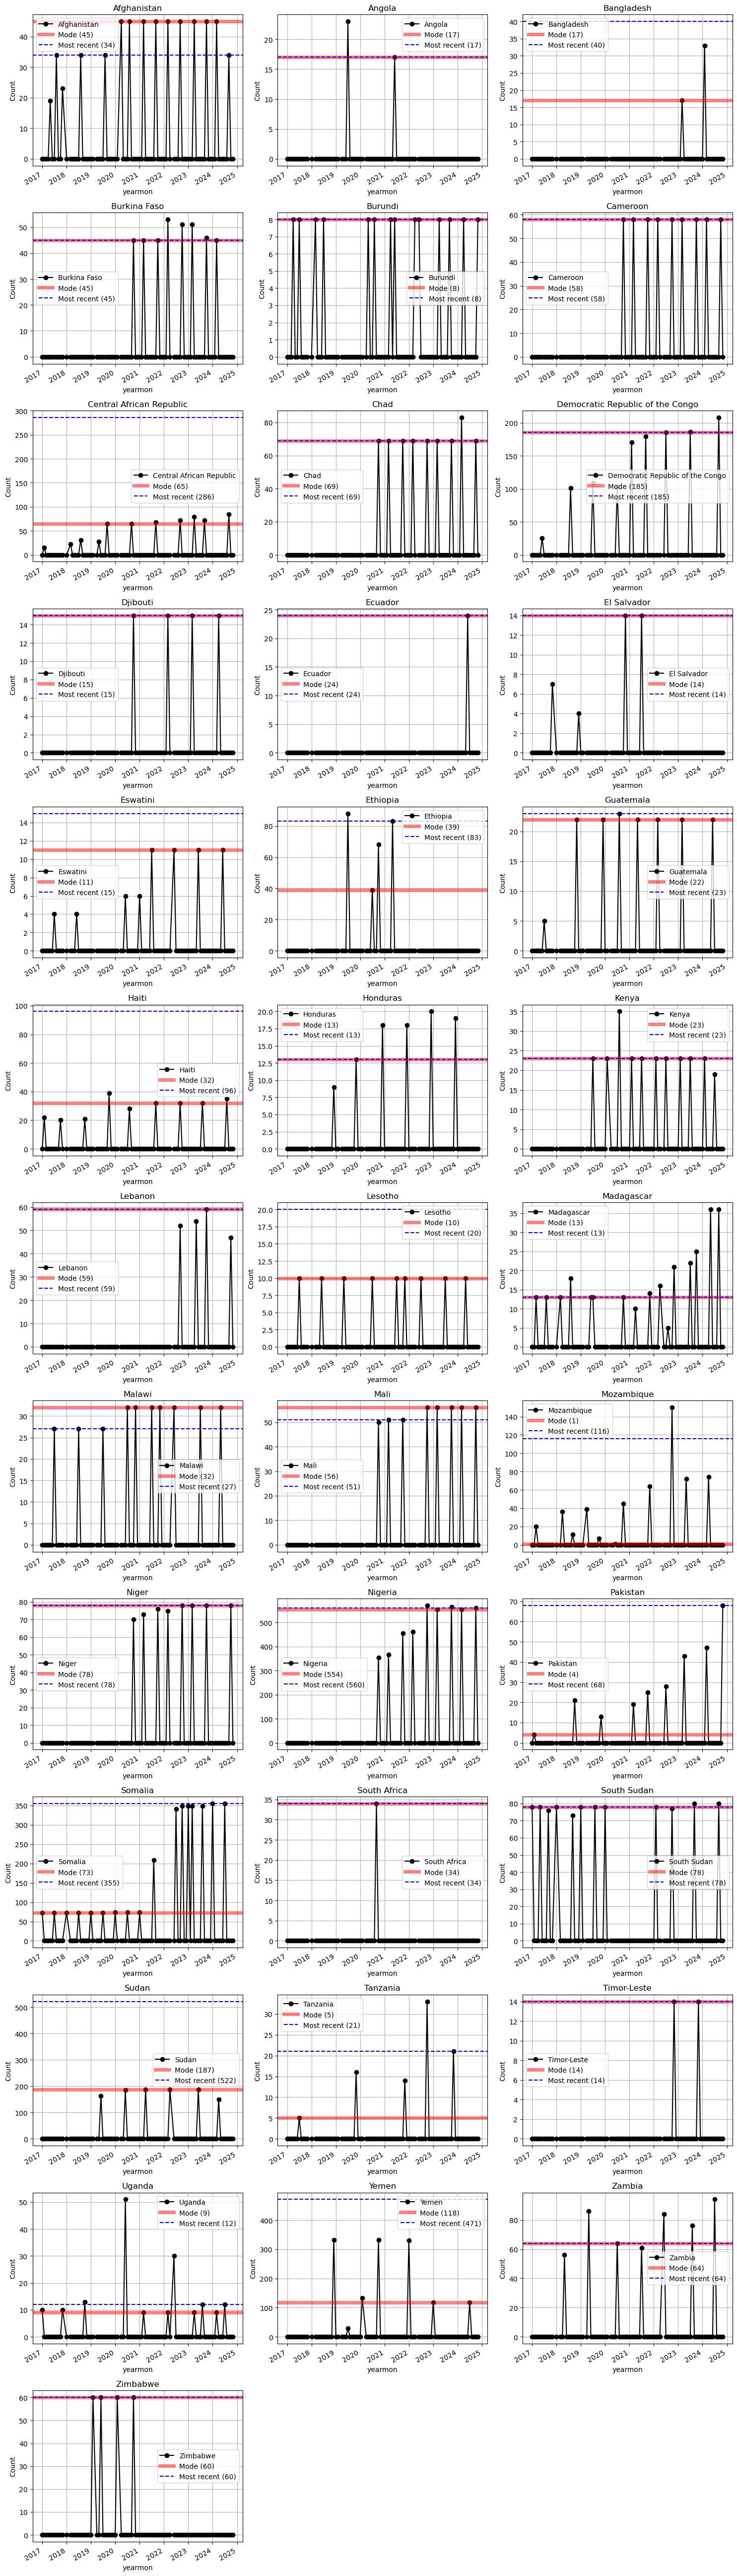

In [115]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math

# Prepare grouped data
df_plot = ipc_final_gdf.groupby(['yearmon','country_name'])['unique_name'].count().unstack(fill_value=0)
df_plot.index = pd.to_datetime(df_plot.index)  # ensure datetime index

# Number of countries
n_countries = len(df_plot.columns)
n_cols = 3
n_rows = math.ceil(n_countries / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

# Define yearly ticks
year_locator = mdates.YearLocator()
year_fmt = mdates.DateFormatter("%Y")

for i, country in enumerate(df_plot.columns):
    series = df_plot[country]
    nonzero = series[series > 0]   # ignore zeros
    
    if nonzero.empty:
        continue  # skip if no nonzero values
    
    # Plot time series
    series.plot(ax=axes[i], marker='o', color="black")
    axes[i].set_title(country)
    axes[i].set_ylabel("Count")
    axes[i].xaxis.set_major_locator(year_locator)
    axes[i].xaxis.set_major_formatter(year_fmt)
    axes[i].grid(True)
    
    # --- Reference lines ---
    # Mode of counts excluding zeros
    mode_val = nonzero.mode().iloc[0]
    axes[i].axhline(y=mode_val, color="red", linestyle="-", linewidth = 5, alpha = 0.5, label=f"Mode ({mode_val})")
    
    # Most recent non-zero count
    recent_val = nonzero.iloc[-1]   # last non-zero
    axes[i].axhline(y=recent_val, color="blue", linestyle="--", label=f"Most recent ({recent_val})")
    
    # Add legend
    axes[i].legend()

# Remove unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [79]:
ipc_final['unique_name'].value_counts().sort_index()

Afghanistan_2017-05    19
Afghanistan_2017-08    34
Afghanistan_2017-11    23
Afghanistan_2018-08    34
Afghanistan_2019-08    34
                       ..
Zambia_2024-07         94
Zimbabwe_2019-02       60
Zimbabwe_2019-06       60
Zimbabwe_2020-02       60
Zimbabwe_2020-10       60
Name: unique_name, Length: 320, dtype: int64

In [80]:
# OR save as GeoJSON
ipc_final_gdf.to_file(os.path.join(home, 'stores', 'processed', 'ipc_final_gdf.geojson'), driver='GeoJSON')

# Load IPC Final DF & Subset IPC Final DF (selected countries)

In [8]:
# Load IPC Geojson
ipc_final_gdf = gpd.read_file(home +r'\\stores\\processed\\ipc_final_gdf.geojson')

In [81]:
ipc_final_gdf['unique_name'].unique()#[ipc_final_gdf['district'].str.contains('Refugee', na = False, case = False)]['unique_name'].unique()

array(['Afghanistan_2017-08', 'Afghanistan_2017-05',
       'Afghanistan_2018-08', 'Afghanistan_2017-11',
       'Afghanistan_2019-08', 'Afghanistan_2020-08',
       'Afghanistan_2020-04', 'Afghanistan_2021-09',
       'Afghanistan_2021-03', 'Afghanistan_2022-09',
       'Afghanistan_2022-03', 'Afghanistan_2023-10',
       'Afghanistan_2023-04', 'Afghanistan_2024-09',
       'Afghanistan_2024-03', 'Angola_2019-07', 'Angola_2021-06',
       'Bangladesh_2023-03', 'Bangladesh_NaT', 'Bangladesh_2024-02',
       'Burkina Faso_2020-10', 'Burkina Faso_2021-10',
       'Burkina Faso_2021-03', 'Burkina Faso_2022-10',
       'Burkina Faso_2022-03', 'Burkina Faso_2023-10',
       'Burkina Faso_2023-03', 'Burkina Faso_2024-03', 'Burundi_2017-07',
       'Burundi_2017-04', 'Burundi_2018-07', 'Burundi_2018-03',
       'Burundi_2020-08', 'Burundi_2020-05', 'Burundi_2021-06',
       'Burundi_2021-04', 'Burundi_2022-06', 'Burundi_2022-04',
       'Burundi_2023-09', 'Burundi_2023-04', 'Burundi_2024-11',

In [16]:
ipc_final_gdf[ipc_final_gdf['country_name']=='Malawi']['yearmon'].value_counts()

2021-11    32
2020-11    32
2021-07    32
2023-07    32
2022-06    32
2020-07    32
2024-05    32
2017-07    27
NaT        27
2018-07    27
2019-07    27
Name: yearmon, dtype: int64

In [15]:
ipc_final_gdf[ipc_final_gdf['country_name']=='Democratic Republic of the Congo']['yearmon'].value_counts()

2024-09    208
2023-07    186
NaT        185
2022-07    185
2021-09    179
2021-02    170
2019-07    109
2020-07    103
2018-08    101
2017-06     25
Name: yearmon, dtype: int64

In [9]:
ipc_final_gdf[(ipc_final_gdf['district']=='Ouest ht07')
             &(ipc_final_gdf['unique_name']=='Haiti_2021-09')].columns.tolist()#[[t for t in ipc_final_gdf if t.endswith('pop')]]

['analysis_id',
 'yearmon',
 'country_name',
 'unique_name',
 'population',
 'estimated_population',
 'p3plus',
 'p3plus_percentage',
 'overall_phase',
 'phase1_percentage',
 'phase2_percentage',
 'phase3_percentage',
 'phase4_percentage',
 'phase5_percentage',
 'phase1_percentage_projected',
 'phase2_percentage_projected',
 'phase3_percentage_projected',
 'phase4_percentage_projected',
 'phase5_percentage_projected',
 'phase1_percentage_second_projected',
 'phase2_percentage_second_projected',
 'phase3_percentage_second_projected',
 'phase4_percentage_second_projected',
 'phase5_percentage_second_projected',
 'district',
 'geometry']

In [21]:
# Key countries for merge (Price and Conflict)
key_countries =[#'Democratic Republic of the Congo',
 #'Sudan',
 #'Central African Republic',
 'Afghanistan',
 'Haiti',
 'Kenya']

key_country_ipc_df = ipc_final_gdf[(ipc_final_gdf['country_name'].isin(key_countries))
             &(ipc_final_gdf['yearmon']>='2021-01-01')
             &(ipc_final_gdf['yearmon']<='2022-12-01')
            &(~ipc_final_gdf['district'].str.contains('Urban', na = False, case = False))]#['unique_name'].value_counts().sort_index()

key_country_ipc_df['yearmon'] = pd.to_datetime(key_country_ipc_df['yearmon'])

C:\Users\ck24\.conda\envs\master\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [22]:
key_country_ipc_df['unique_name'].value_counts().sort_index()

Afghanistan_2021-03    34
Afghanistan_2021-09    34
Afghanistan_2022-03    34
Afghanistan_2022-09    34
Haiti_2021-09          32
Haiti_2022-09          32
Kenya_2021-02          23
Kenya_2021-07          23
Kenya_2022-02          23
Kenya_2022-07          23
Name: unique_name, dtype: int64

# Load ACLED

In [23]:
from functools import reduce
from shapely.geometry import Point

In [38]:
#Load ACLED Entire DF
acled_df_final = pd.read_csv(home+'\stores\processed\conflict_df.csv')

In [39]:
from utils import (
    add_time_lags,
    add_seasonal_anomalies,
    add_rolling_means,
    add_rolling_anomalies,
    add_rolling_lag_means,
)

In [40]:
print('Subset following countries', key_countries)
key_acled_sub_df = acled_df_final[acled_df_final['country'].isin(key_countries)]


# Assuming your DataFrame is called df and has 'lat' and 'lon' columns
# (If your column names are different, replace them accordingly)
#acled_sub_df['geometry'] = acled_sub_df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Convert to GeoDataFrame
#acled_sub_gdf = gpd.GeoDataFrame(acled_sub_df, geometry='geometry', crs='EPSG:4326')  # WGS84 lat/lon projection

Subset following countries ['Afghanistan', 'Haiti', 'Kenya']


In [27]:
#key_country_ipc_df = key_country_ipc_df.to_crs(epsg=4326)
#key_acled_sub_gdf = key_acled_sub_gdf.to_crs(epsg=4326)

## Define Functions to create indicators

In [41]:
import numpy as np
import pandas as pd

def add_rolling_anomalies_dev(df, value_col, unit_col, date_col):
    """
    Adds rolling mean, standard deviation, z-score anomalies, and percentage deviation 
    using a 12-month rolling window per unit.

    Parameters:
    - df: input DataFrame
    - value_col: name of the column to compute anomalies on
    - unit_col: column to group by (e.g., region or location ID)
    - date_col: datetime column to sort by
    """
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df = df.sort_values([unit_col, date_col])

    # Rolling mean and std
    df[f'{value_col}_rolling_mean'] = (
        df.groupby(unit_col)[value_col]
          .transform(lambda x: x.rolling(window=12, min_periods=6).mean())
    )
    df[f'{value_col}_rolling_std'] = (
        df.groupby(unit_col)[value_col]
          .transform(lambda x: x.rolling(window=24, min_periods=6).std())
    )

    # Raw deviation from rolling mean
    df[f'{value_col}_deviation'] = df[value_col] - df[f'{value_col}_rolling_mean']

    # Percentage deviation (robust to 0 mean or NaN)
    mean_safe = df[f'{value_col}_rolling_mean'].replace(0, np.nan)
    df[f'{value_col}_pct_dev'] = (
        df[f'{value_col}_deviation'] / mean_safe
    )

    # If both value and mean are 0, define pct_dev = 0
    both_zero = (df[value_col] == 0) & (df[f'{value_col}_rolling_mean'] == 0)
    df.loc[both_zero, f'{value_col}_pct_dev'] = 0

    # Z-score (robust to zero std)
    std_safe = df[f'{value_col}_rolling_std'].replace(0, np.nan)
    df[f'{value_col}_zscore'] = df[f'{value_col}_deviation'] / std_safe

    # Anomaly flags
    df[f'{value_col}_below_1sd'] = (df[f'{value_col}_zscore'] <= -1).fillna(False).astype(int)
    df[f'{value_col}_below_2sd'] = (df[f'{value_col}_zscore'] <= -2).fillna(False).astype(int)
    df[f'{value_col}_above_1sd'] = (df[f'{value_col}_zscore'] >= 1).fillna(False).astype(int)
    df[f'{value_col}_above_2sd'] = (df[f'{value_col}_zscore'] >= 2).fillna(False).astype(int)

    return df


In [78]:
def add_rsi(df, value_col, unit_col, date_col, window=12):
    """
    Adds RSI (Relative Strength Index) to a time series DataFrame.
    
    Parameters:
    - df: DataFrame with date and value
    - value_col: name of the numeric column to calculate RSI on
    - unit_col: column to group by (e.g., region)
    - date_col: datetime column
    - window: RSI window (default=14)
    """
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df = df.sort_values([unit_col, date_col])

    def calc_rsi(series):
        delta = series.diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)

        avg_gain = gain.rolling(window=window, min_periods=window).mean()
        avg_loss = loss.rolling(window=window, min_periods=window).mean()

        rs = avg_gain / avg_loss
        rsi = 100 - (100 / (1 + rs))
        return rsi

    df[f'{value_col}_RSI'] = (
        df.groupby(unit_col)[value_col]
          .transform(calc_rsi)
    )

    return df

def add_rolling_mean(df, value_col, unit_col, date_col, window=6, min_periods=1):
    """
    Adds an n-month rolling mean column to the DataFrame.
    
    Parameters:
    - df: input DataFrame
    - value_col: name of the column to compute the rolling mean on
    - unit_col: column to group by (e.g., region or location ID)
    - date_col: datetime column to sort by
    - window: size of the rolling window in months (default: 3)
    - min_periods: minimum number of observations in window required (default: 1)
    
    Returns:
    - df with an added column named '{value_col}_rolling_mean_{window}'
    """
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df = df.sort_values([unit_col, date_col])

    rolling_col_name = f'{value_col}_rolling_mean_{window}'

    df[rolling_col_name] = (
        df.groupby(unit_col)[value_col]
          .transform(lambda x: x.rolling(window=window, min_periods=min_periods).mean())
    )

    return df


# Afghanistan

In [79]:
c_name = 'Afghanistan'
# 1. Ensure both GeoDataFrames use the same CRS
country_ipc_df = key_country_ipc_df[key_country_ipc_df['country_name']==c_name]
acled_sub_df = key_acled_sub_df[key_acled_sub_df['country']==c_name]

#Change duplicates name
country_ipc_df['district'] = country_ipc_df['district'].replace({'TANA RIVER':'Tana river'}) # For Kenya
print('ipc unique # of district:', country_ipc_df['district'].nunique())
print('acled unique # of district:', acled_sub_df['adm1_name'].nunique())


C:\Users\ck24\.conda\envs\master\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


ipc unique # of district: 34
acled unique # of district: 34


In [80]:
acled_sub_df['adm1_name'].unique()

array(['Badakhshan', 'Badghis', 'Baghlan', 'Balkh', 'Daykundi', 'Farah',
       'Faryab', 'Ghazni', 'Helmand', 'Herat', 'Jowzjan', 'Kabul',
       'Kandahar', 'Kapisa', 'Khost', 'Kunar', 'Kunduz', 'Laghman',
       'Logar', 'Nangarhar', 'Nimruz', 'Nuristan', 'Paktia', 'Paktika',
       'Parwan', 'Samangan', 'Sar-e Pol', 'Takhar', 'Urozgan', 'Wardak',
       'Zabul', 'Bamyan', 'Ghor', 'Panjshir'], dtype=object)

In [81]:
country_ipc_df['district'].unique()

array(['Parwan', 'Panjsher', 'Zabul', 'Paktya', 'Khost', 'Wardak',
       'Badghis', 'Nimroz', 'Samangan', 'Nangarhar', 'Sari pul', 'Kunar',
       'Logar', 'Kandahar', 'Uruzgan', 'Kapisa', 'Baghlan', 'Hilmand',
       'Badakhshan', 'Takhar', 'Balkh', 'Ghazni', 'Jawzjan', 'Faryab',
       'Ghor', 'Nuristan', 'Kabul', 'Paktika', 'Laghman', 'Kunduz',
       'Daykundi', 'Bamyan', 'Hirat', 'Farah'], dtype=object)

In [82]:
afghanistan_province_map = {
    'Parwan': 'Parwan',
    'Panjsher': 'Panjshir',
    'Zabul': 'Zabul',
    'Paktya': 'Paktia',
    'Khost': 'Khost',
    'Wardak': 'Wardak',
    'Badghis': 'Badghis',
    'Nimroz': 'Nimruz',
    'Samangan': 'Samangan',
    'Nangarhar': 'Nangarhar',
    'Sari pul': 'Sar-e Pol',
    'Kunar': 'Kunar',
    'Logar': 'Logar',
    'Kandahar': 'Kandahar',
    'Uruzgan': 'Urozgan',
    'Kapisa': 'Kapisa',
    'Baghlan': 'Baghlan',
    'Hilmand': 'Helmand',
    'Badakhshan': 'Badakhshan',
    'Takhar': 'Takhar',
    'Balkh': 'Balkh',
    'Ghazni': 'Ghazni',
    'Jawzjan': 'Jowzjan',
    'Faryab': 'Faryab',
    'Ghor': 'Ghor',
    'Nuristan': 'Nuristan',
    'Kabul': 'Kabul',
    'Paktika': 'Paktika',
    'Laghman': 'Laghman',
    'Kunduz': 'Kunduz',
    'Daykundi': 'Daykundi',
    'Bamyan': 'Bamyan',
    'Hirat': 'Herat',
    'Farah': 'Farah'
}
country_ipc_df['region'] = country_ipc_df['district'].map(afghanistan_province_map)
country_ipc_df['yearmon'] = pd.to_datetime(country_ipc_df['yearmon'])

In [83]:
# Agg acled at country level
acled_anomaly_final = acled_sub_df.drop_duplicates(subset = ['Unnamed: 0']).groupby(['yearmon','adm1_name']).sum().reset_index().copy()

# This will hold minimal processed outputs to be merged later
processed_dfs = []

event_cols = ['Political violence',
'Demonstrations',
'Strategic developments',
'Political violence; Demonstrations']


for target_var in event_cols+['fatalities_total']:
    # Minimal subset to avoid working on full frame
    #temp_df = acled_df_final[base_cols + [target_var]].copy()

    # Add rolling means and anomalies
    acled_anomaly_final = add_rsi(acled_anomaly_final, target_var, unit_col='adm1_name', date_col='yearmon')
    acled_anomaly_final = add_rolling_mean(acled_anomaly_final, target_var+'_RSI', unit_col='adm1_name', date_col='yearmon')
    acled_anomaly_final = add_rolling_anomalies_dev(acled_anomaly_final, value_col=target_var, unit_col='adm1_name', date_col='yearmon')


<AxesSubplot:label='9de2cc98-346f-43b6-82c3-0863a81e9160', xlabel='yearmon'>

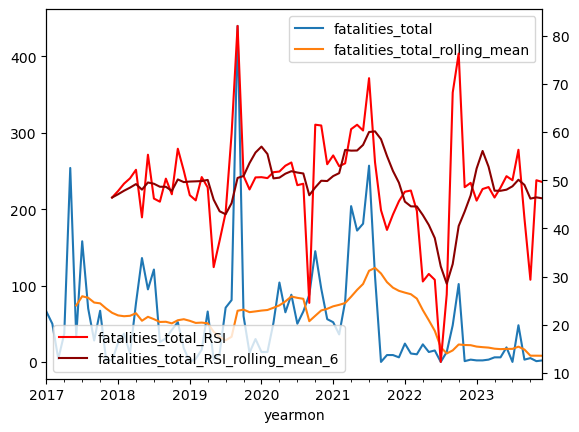

In [87]:

ax = acled_anomaly_final[acled_anomaly_final['adm1_name']=='Badakhshan'].groupby(['yearmon'])[['fatalities_total','fatalities_total_rolling_mean']].mean().plot()
ax1 = ax.twinx()
acled_anomaly_final[acled_anomaly_final['adm1_name']=='Badakhshan'].groupby(['yearmon'])[['fatalities_total_RSI']].mean().plot(ax = ax1, color = 'red')
acled_anomaly_final[acled_anomaly_final['adm1_name']=='Badakhshan'].groupby(['yearmon'])[['fatalities_total_RSI_rolling_mean_6']].mean().plot(ax = ax1, color = 'darkred')


<AxesSubplot:label='e8c03929-e8f8-4c3c-8b1b-c7d56521d2e7', xlabel='yearmon'>

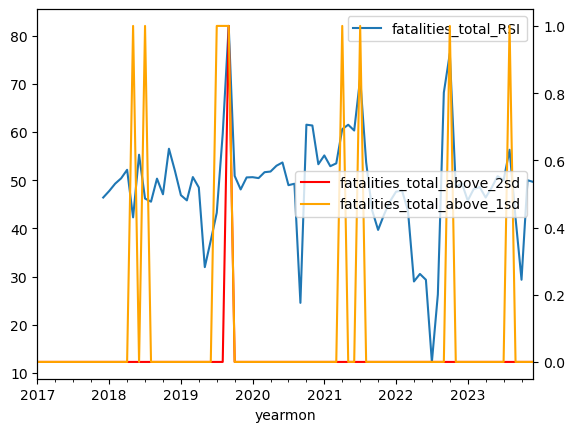

In [90]:

ax = acled_anomaly_final[acled_anomaly_final['adm1_name']=='Badakhshan'].groupby(['yearmon'])[['fatalities_total_RSI']].mean().plot()
ax1 = ax.twinx()
acled_anomaly_final[acled_anomaly_final['adm1_name']=='Badakhshan'].groupby(['yearmon'])[['fatalities_total_above_2sd']].mean().plot(ax = ax1, color = 'red')
acled_anomaly_final[acled_anomaly_final['adm1_name']=='Badakhshan'].groupby(['yearmon'])[['fatalities_total_above_1sd']].mean().plot(ax = ax1, color = 'orange')


In [91]:
afg_ipc_acled_df = country_ipc_df.merge(acled_anomaly_final, left_on = ['region','yearmon'], 
                                        right_on = ['adm1_name','yearmon'])#[['fatalities_total_rolling_mean_3','p3plus_percentage']].corr()
afg_ipc_acled_df.to_csv(home+r'\\stores\\processed\\ipc_acled_afg.csv')


## Haiti

In [202]:
c_name = 'Haiti'
# 1. Ensure both GeoDataFrames use the same CRS
country_ipc_df = key_country_ipc_df[key_country_ipc_df['country_name']==c_name]
acled_sub_df = key_acled_sub_df[key_acled_sub_df['country']==c_name]

#Change duplicates name
country_ipc_df['district'] = country_ipc_df['district'].replace({'TANA RIVER':'Tana river'}) # For Kenya
print('ipc unique # of district:', country_ipc_df['district'].nunique())
print('acled unique # of adm1:', acled_sub_df['adm1_name'].nunique())


ipc unique # of district: 32
acled unique # of adm1: 10


C:\Users\ck24\.conda\envs\master\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:xlabel='yearmon'>

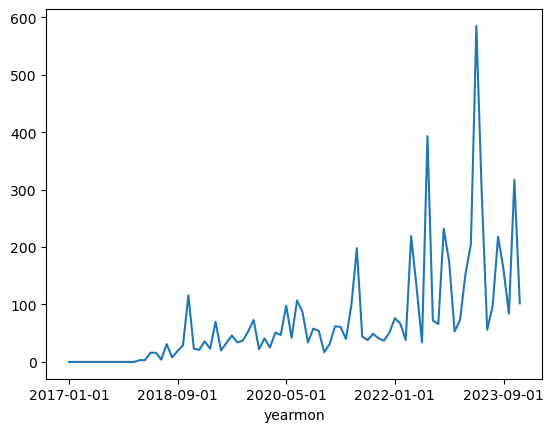

In [205]:
acled_sub_df.groupby('yearmon')['fatalities_total'].sum().plot()

In [94]:
country_ipc_df['district'].unique()

array(['Port au Prince P+TP', 'Bas plateau ht03', 'Haut plateau ht03',
       'Artibonite ht04', 'Artibonite_ht01', 'Artibonite ht03',
       'Ouest_ht01-la gonave', 'Ouest ht05', 'Ouest ht06', 'Ouest ht07',
       'Grande-anse ht07', 'Grande-anse ht08', 'Ville de Jérémie',
       'Sud ht01', 'Sud ht07', 'Sud ht08', 'Ville des Cayes',
       'Petion Ville P+TP', 'Nippes ht01', 'Nippes ht07', 'Sud-est ht01',
       'Sud-est ht07', 'Carrefour_P+TP', 'Cite Soleil P_TP',
       'Croix de Bouquet P+ TP', 'Nord ht02', 'Nord ht03', 'Delmas P+TP',
       'Nord-est ht02', 'Nord-ouest ht01', 'Nord-ouest ht02',
       'Tabarre P+TP'], dtype=object)

In [95]:
# Haiti
haiti_region_map = {
    'Port au Prince P+TP': 'Ouest',
    'Bas plateau ht03': 'Centre',
    'Haut plateau ht03': 'Centre',
    'Artibonite ht04': 'Artibonite',
    'Artibonite_ht01': 'Artibonite',
    'Artibonite ht03': 'Artibonite',
    'Ouest_ht01-la gonave': 'Ouest',
    'Ouest ht05': 'Ouest',
    'Ouest ht06': 'Ouest',
    'Ouest ht07': 'Ouest',
    'Grande-anse ht07': 'Grande-Anse',
    'Grande-anse ht08': 'Grande-Anse',
    'Ville de Jérémie': 'Grande-Anse',
    'Sud ht01': 'Sud',
    'Sud ht07': 'Sud',
    'Sud ht08': 'Sud',
    'Ville des Cayes': 'Sud',
    'Petion Ville P+TP': 'Ouest',
    'Nippes ht01': 'Nippes',
    'Nippes ht07': 'Nippes',
    'Sud-est ht01': 'Sud-Est',
    'Sud-est ht07': 'Sud-Est',
    'Carrefour_P+TP': 'Ouest',
    'Cite Soleil P_TP': 'Ouest',
    'Croix de Bouquet P+ TP': 'Ouest',
    'Nord ht02': 'Nord',
    'Nord ht03': 'Nord',
    'Delmas P+TP': 'Ouest',
    'Nord-est ht02': 'Nord-Est',
    'Nord-ouest ht01': 'Nord-Ouest',
    'Nord-ouest ht02': 'Nord-Ouest',
    'Tabarre P+TP': 'Ouest',
}

country_ipc_df['region'] = country_ipc_df['district'].map(haiti_region_map)

In [96]:
# Agg acled at country level
acled_anomaly_final = acled_sub_df.drop_duplicates(subset = ['Unnamed: 0']).groupby(['yearmon','adm1_name']).sum().reset_index().copy()

# This will hold minimal processed outputs to be merged later
processed_dfs = []

event_cols = ['Political violence',
'Demonstrations',
'Strategic developments',
'Political violence; Demonstrations']


for target_var in event_cols+['fatalities_total']:
    # Minimal subset to avoid working on full frame
    #temp_df = acled_df_final[base_cols + [target_var]].copy()

    # Add rolling means and anomalies
    acled_anomaly_final = add_rsi(acled_anomaly_final, target_var, unit_col='adm1_name', date_col='yearmon')
    acled_anomaly_final = add_rolling_mean(acled_anomaly_final, target_var+'_RSI', unit_col='adm1_name', date_col='yearmon')
    acled_anomaly_final = add_rolling_anomalies_dev(acled_anomaly_final, value_col=target_var, unit_col='adm1_name', date_col='yearmon')


<AxesSubplot:label='45468bd0-6d04-4d0b-82fc-394ee906fc69', xlabel='yearmon'>

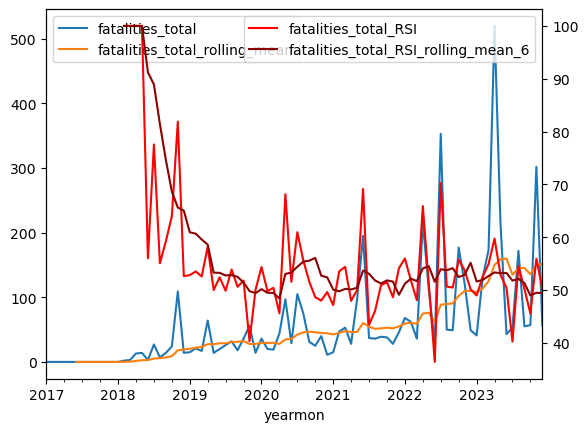

In [99]:

ax = acled_anomaly_final[acled_anomaly_final['adm1_name']=='Ouest'].groupby(['yearmon'])[['fatalities_total','fatalities_total_rolling_mean']].mean().plot()
ax1 = ax.twinx()
acled_anomaly_final[acled_anomaly_final['adm1_name']=='Ouest'].groupby(['yearmon'])[['fatalities_total_RSI']].mean().plot(ax = ax1, color = 'red')
acled_anomaly_final[acled_anomaly_final['adm1_name']=='Ouest'].groupby(['yearmon'])[['fatalities_total_RSI_rolling_mean_6']].mean().plot(ax = ax1, color = 'darkred')


<AxesSubplot:label='52fd9ff6-6c41-4072-933f-cffe2752a462', xlabel='yearmon'>

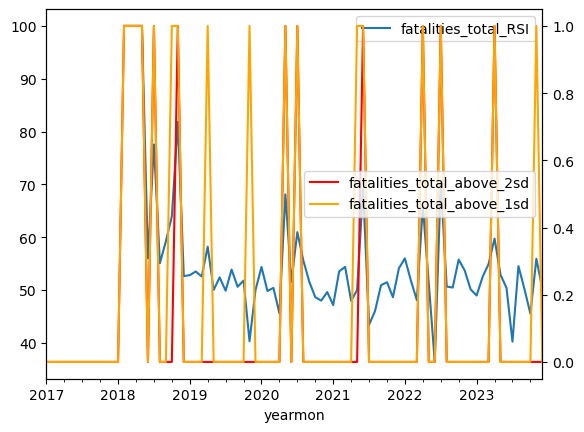

In [100]:

ax = acled_anomaly_final[acled_anomaly_final['adm1_name']=='Ouest'].groupby(['yearmon'])[['fatalities_total_RSI']].mean().plot()
ax1 = ax.twinx()
acled_anomaly_final[acled_anomaly_final['adm1_name']=='Ouest'].groupby(['yearmon'])[['fatalities_total_above_2sd']].mean().plot(ax = ax1, color = 'red')
acled_anomaly_final[acled_anomaly_final['adm1_name']=='Ouest'].groupby(['yearmon'])[['fatalities_total_above_1sd']].mean().plot(ax = ax1, color = 'orange')


In [101]:

haiti_ipc_acled_df = country_ipc_df.merge(acled_anomaly_final, left_on = ['region','yearmon'], right_on = ['adm1_name','yearmon'])#[['fatalities_total_rolling_mean_3','p3plus_percentage']].corr()
haiti_ipc_acled_df.to_csv(home+r'\\stores\\processed\\ipc_acled_haiti.csv')


In [102]:
haiti_ipc_acled_df

analysis_id    yearmon country_name    unique_name  population  \
0      24259834 2021-09-01        Haiti  Haiti_2021-09    12900000   
1      24259834 2021-09-01        Haiti  Haiti_2021-09    12900000   
2      24259834 2021-09-01        Haiti  Haiti_2021-09    12900000   
3      24259834 2021-09-01        Haiti  Haiti_2021-09    12900000   
4      24259834 2021-09-01        Haiti  Haiti_2021-09    12900000   
..          ...        ...          ...            ...         ...   
59     26468816 2022-09-01        Haiti  Haiti_2022-09    10911819   
60     26468816 2022-09-01        Haiti  Haiti_2022-09    10911819   
61     26468816 2022-09-01        Haiti  Haiti_2022-09    10911819   
62     26468816 2022-09-01        Haiti  Haiti_2022-09    10911819   
63     26468816 2022-09-01        Haiti  Haiti_2022-09    10911819   

    estimated_population    p3plus  p3plus_percentage  overall_phase  \
0                 955459  382184.0               0.40            3.0   
1                  87077   43539.0               0.50            3.0   
2                 198551   89348.0               0.45            3.0   
3                 120156   48063.0               0.40            3.0   
4                1005027  402011.0               0.40            3.0   
..                   ...       ...                ...            ...   
59                213716   96172.0               0.45            4.0   
60                 94602   42571.0               0.45            3.0   
61                399618  179828.0               0.45            3.0   
62                226223  124423.0               0.55            4.0   
63                 86780   39051.0               0.45            3.0   

    phase1_percentage  ...  fatalities_total_RSI_rolling_mean_6  \
0                0.30  ...                            51.227696   
1                0.25  ...                            51.227696   
2                0.25  ...                            51.227696   
3                0.40  ...                            51.227696   
4                0.35  ...                            51.227696   
..                ...  ...                                  ...   
59               0.30  ...                            54.312169   
60               0.25  ...                            52.961301   
61               0.30  ...                            52.961301   
62               0.20  ...                            52.961301   
63               0.25  ...                            52.961301   

    fatalities_total_rolling_mean  fatalities_total_rolling_std  \
0                       51.916667                     40.628553   
1                       51.916667                     40.628553   
2                       51.916667                     40.628553   
3                       51.916667                     40.628553   
4                       51.916667                     40.628553   
..                            ...                           ...   
59                       0.500000                      0.750604   
60                       1.666667                      1.893926   
61                       1.666667                      1.893926   
62                       1.666667                      1.893926   
63                       1.666667                      1.893926   

    fatalities_total_deviation  fatalities_total_pct_dev  \
0                   -12.916667                 -0.248796   
1                   -12.916667                 -0.248796   
2                   -12.916667                 -0.248796   
3                   -12.916667                 -0.248796   
4                   -12.916667                 -0.248796   
..                         ...                       ...   
59                    1.500000                  3.000000   
60                    4.333333                  2.600000   
61                    4.333333                  2.600000   
62                    4.333333                  2.600000   
63                    4.3333

# Kenya

In [104]:
c_name = 'Kenya'
# 1. Ensure both GeoDataFrames use the same CRS
country_ipc_df = key_country_ipc_df[key_country_ipc_df['country_name']==c_name]
acled_sub_df = key_acled_sub_df[key_acled_sub_df['country']==c_name]

#Change duplicates name
country_ipc_df['district'] = country_ipc_df['district'].replace({'TANA RIVER':'Tana river'}) # For Kenya
print('ipc unique # of district:', country_ipc_df['district'].nunique())
print('acled unique # of adm1:', acled_sub_df['adm1_name'].nunique())


ipc unique # of district: 23
acled unique # of adm1: 47


C:\Users\ck24\.conda\envs\master\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [105]:
acled_sub_df['adm1_name'].unique()

array(['Bomet', 'Busia', 'Elgeyo Marakwet', 'Homa Bay', 'Kisumu', 'Kitui',
       'Laikipia', 'Mandera', 'Mombasa', 'Nairobi', 'Narok', 'Nyamira',
       'Baringo', 'Bungoma', 'Garissa', 'Kiambu', 'Kirinyaga', 'Kwale',
       'Machakos', 'Makueni', 'Nakuru', 'Nyandarua', 'Tana River',
       'Turkana', 'Isiolo', 'Kisii', 'Lamu', 'Muranga', 'Nyeri',
       'Samburu', 'Siaya', 'Kajiado', 'Kilifi', 'Marsabit', 'Migori',
       'Taita Taveta', 'Tharaka-Nithi', 'Uasin Gishu', 'Wajir',
       'West Pokot', 'Kakamega', 'Meru', 'Nandi', 'Trans Nzoia', 'Embu',
       'Kericho', 'Vihiga'], dtype=object)

In [106]:
country_ipc_df['district'].unique()

array(['Marsabit', 'Garissa', 'Kitui', 'Kajiado', 'Makueni', 'Wajir',
       'West pokot', 'Turkana', 'Nyeri', 'Narok', 'Tharaka', 'Tana river',
       'Taita', 'Samburu', 'Meru', 'Lamu county', 'Kilifi', 'Kwale',
       'Mandera', 'Laikipia', 'Isiolo', 'Embu', 'Baringo'], dtype=object)

In [107]:
# Kenya
kenya_county_map = {
    'Marsabit': 'Marsabit',
    'Garissa': 'Garissa',
    'Kitui': 'Kitui',
    'Kajiado': 'Kajiado',
    'Makueni': 'Makueni',
    'Wajir': 'Wajir',
    'West pokot': 'West Pokot',
    'Turkana': 'Turkana',
    'Nyeri': 'Nyeri',
    'Narok': 'Narok',
    'Tharaka': 'Tharaka-Nithi',
    'Tana river': 'Tana River',
    'Taita': 'Taita Taveta',
    'Samburu': 'Samburu',
    'Meru': 'Meru',
    'Lamu county': 'Lamu',
    'Kilifi': 'Kilifi',
    'Kwale': 'Kwale',
    'Mandera': 'Mandera',
    'Laikipia': 'Laikipia',
    'Isiolo': 'Isiolo',
    'Embu': 'Embu',
    'Baringo': 'Baringo'
}


country_ipc_df['region'] = country_ipc_df['district'].map(kenya_county_map)

In [108]:
# Agg acled at country level
acled_anomaly_final = acled_sub_df.drop_duplicates(subset = ['Unnamed: 0']).groupby(['yearmon','adm1_name']).sum().reset_index().copy()

# This will hold minimal processed outputs to be merged later
processed_dfs = []

event_cols = ['Political violence',
'Demonstrations',
'Strategic developments',
'Political violence; Demonstrations']


for target_var in event_cols+['fatalities_total']:
    # Minimal subset to avoid working on full frame
    #temp_df = acled_df_final[base_cols + [target_var]].copy()

    # Add rolling means and anomalies
    acled_anomaly_final = add_rsi(acled_anomaly_final, target_var, unit_col='adm1_name', date_col='yearmon')
    acled_anomaly_final = add_rolling_mean(acled_anomaly_final, target_var+'_RSI', unit_col='adm1_name', date_col='yearmon')
    acled_anomaly_final = add_rolling_anomalies_dev(acled_anomaly_final, value_col=target_var, unit_col='adm1_name', date_col='yearmon')

acled_anomaly_final = add_rolling_mean(acled_anomaly_final, 'fatalities_total_RSI', unit_col='adm1_name', date_col='yearmon')


<AxesSubplot:label='a51b84f5-e72c-4fb2-84dd-b3f2f2e21851', xlabel='yearmon'>

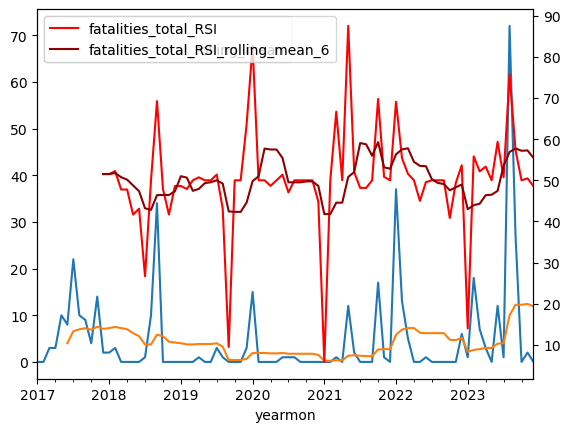

In [111]:

ax = acled_anomaly_final[acled_anomaly_final['adm1_name']=='Lamu'].groupby(['yearmon'])[['fatalities_total','fatalities_total_rolling_mean']].mean().plot()
ax1 = ax.twinx()
acled_anomaly_final[acled_anomaly_final['adm1_name']=='Lamu'].groupby(['yearmon'])[['fatalities_total_RSI']].mean().plot(ax = ax1, color = 'red')
acled_anomaly_final[acled_anomaly_final['adm1_name']=='Lamu'].groupby(['yearmon'])[['fatalities_total_RSI_rolling_mean_6']].mean().plot(ax = ax1, color = 'darkred')


<AxesSubplot:label='14695aa1-f279-4a3d-91c6-af80e3ef2d75', xlabel='yearmon'>

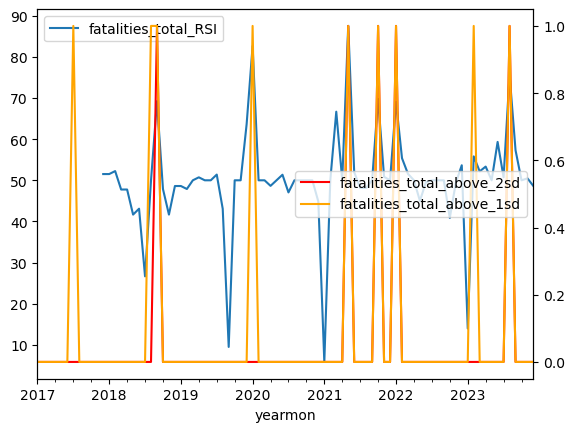

In [112]:

ax = acled_anomaly_final[acled_anomaly_final['adm1_name']=='Lamu'].groupby(['yearmon'])[['fatalities_total_RSI']].mean().plot()
ax1 = ax.twinx()
acled_anomaly_final[acled_anomaly_final['adm1_name']=='Lamu'].groupby(['yearmon'])[['fatalities_total_above_2sd']].mean().plot(ax = ax1, color = 'red')
acled_anomaly_final[acled_anomaly_final['adm1_name']=='Lamu'].groupby(['yearmon'])[['fatalities_total_above_1sd']].mean().plot(ax = ax1, color = 'orange')


In [113]:

kenya_ipc_acled_df = country_ipc_df.merge(acled_anomaly_final, left_on = ['region','yearmon'], right_on = ['adm1_name','yearmon'])#[['fatalities_total_rolling_mean_3','p3plus_percentage']].corr()
kenya_ipc_acled_df.to_csv(home+r'\\stores\\processed\\ipc_acled_kenya.csv')


# Price

In [114]:
from functools import reduce
from shapely.geometry import Point

In [115]:
#Load ACLED Entire DF
price_df_final = pd.read_csv(home+r'\stores\processed\price_df.csv')
price_df_final['yearmon'] = pd.to_datetime(price_df_final['DATES'])

In [116]:
print('Subset following countries', key_countries)
key_price_sub_df = price_df_final[price_df_final['country'].isin(key_countries)]


# Assuming your DataFrame is called df and has 'lat' and 'lon' columns
# (If your column names are different, replace them accordingly)
#acled_sub_df['geometry'] = acled_sub_df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Convert to GeoDataFrame
#acled_sub_gdf = gpd.GeoDataFrame(acled_sub_df, geometry='geometry', crs='EPSG:4326')  # WGS84 lat/lon projection

Subset following countries ['Afghanistan', 'Haiti', 'Kenya']


## Kenya

In [117]:
c_name = 'Kenya'
# 1. Ensure both GeoDataFrames use the same CRS
price_sub_df = key_price_sub_df[key_price_sub_df['country']==c_name]

#Change duplicates name
print('ipc unique # of district:', kenya_ipc_acled_df['adm1_name'].nunique())
print('price unique # of adm1:', price_sub_df['adm2_name'].nunique())


ipc unique # of district: 23
price unique # of adm1: 21


In [118]:
print(sorted(price_sub_df['adm2_name'].unique()))
print('\n')
print('Target Names: \n', sorted(kenya_ipc_acled_df['adm1_name'].unique()))


['Baringo', 'Garissa', 'Isiolo', 'Kajiado', 'Kilifi', 'Kisumu', 'Kitui', 'Kwale', 'Machakos', 'Makueni', 'Mandera', 'Marsabit', 'Meru South', 'Mombasa', 'Nairobi', 'Nakuru', 'Nyeri', 'Turkana', 'Uasin Gishu', 'Wajir', 'West Pokot']


Target Names: 
 ['Baringo', 'Embu', 'Garissa', 'Isiolo', 'Kajiado', 'Kilifi', 'Kitui', 'Kwale', 'Laikipia', 'Lamu', 'Makueni', 'Mandera', 'Marsabit', 'Meru', 'Narok', 'Nyeri', 'Samburu', 'Taita Taveta', 'Tana River', 'Tharaka-Nithi', 'Turkana', 'Wajir', 'West Pokot']


In [119]:
# Kenya
kenya_county_map = {
    'Mombasa': None,              # Not in second list
    'Garissa': 'Garissa',
    'Nairobi': None,              # Not in second list
    'Uasin Gishu': None,          # Not in second list
    'Turkana': 'Turkana',
    'Kajiado': 'Kajiado',
    'Isiolo': 'Isiolo',
    'Meru South': 'Meru',
    'Nyeri': 'Nyeri',
    'Makueni': 'Makueni',
    'Kisumu': None,               # Not in second list
    'Kilifi': 'Kilifi',
    'Kitui': 'Kitui',
    'West Pokot': 'West Pokot',
    'Baringo': 'Baringo',
    'Marsabit': 'Marsabit',
    'Nakuru': None,              # Not in second list
    'Mandera': 'Mandera',
    'Machakos': None,            # Not in second list
    'Kwale': 'Kwale',
    'Wajir': 'Wajir'
}


price_sub_df['region'] = price_sub_df['adm2_name'].map(kenya_county_map)

C:\Users\ck24\AppData\Local\Temp\ipykernel_52244\961476164.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_sub_df['region'] = price_sub_df['adm2_name'].map(kenya_county_map)


In [158]:
def calculate_seasonal_food_inflation_anomaly(df, unit_col, date_col, inflation_col):
    """
    Calculate food inflation anomalies accounting for monthly seasonality by region.

    Parameters:
    - df: pandas DataFrame
    - unit_col: column name for region or unit identifier
    - date_col: column name for date (must be convertible to datetime)
    - inflation_col: column name for food inflation value

    Returns:
    - df: DataFrame with added columns:
        - 'month': extracted month
        - 'seasonal_mean': mean inflation for that region-month
        - 'seasonal_std': std dev for that region-month
        - 'zscore_anomaly': (value - mean) / std
        - 'percent_deviation': (value - mean) / mean
        - 'anomaly_above_2sd': 1 if z-score ≥ 2
        - 'anomaly_below_2sd': 1 if z-score ≤ -2
    """
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df['month'] = df[date_col].dt.month

    # Step 1: Compute seasonal mean and std
    seasonal_stats = (
        df.groupby([unit_col, 'month'])[inflation_col]
        .agg(seasonal_mean='mean', seasonal_std='std')
        .reset_index()
    )

    # Step 2: Merge back
    df = df.merge(seasonal_stats, on=[unit_col, 'month'], how='left')

    # Step 3: Calculate anomalies
    df['zscore_anomaly'] = (df[inflation_col] - df['seasonal_mean']) / df['seasonal_std']
    df['percent_deviation'] = np.where(
        df['seasonal_mean'] != 0,
        (df[inflation_col] - df['seasonal_mean']) / df['seasonal_mean'],
        np.nan
    )

    # Step 4: 2SD anomaly flags
    df['anomaly_above_1sd'] = (df['zscore_anomaly'] >= 1.6).astype(int)
    df['anomaly_below_1sd'] = (df['zscore_anomaly'] <= -1.6).astype(int)
    df['anomaly_above_2sd'] = (df['zscore_anomaly'] >= 2).astype(int)
    df['anomaly_below_2sd'] = (df['zscore_anomaly'] <= -2).astype(int)

    return df


In [163]:
# Agg acled at country level
price_anomaly_final = price_sub_df.groupby(['yearmon','region']).sum().reset_index().copy()

# This will hold minimal processed outputs to be merged later
processed_dfs = []


for target_var in [t for t in price_df_final if 'inflation_food' in t]:
    # Minimal subset to avoid working on full frame
    #temp_df = acled_df_final[base_cols + [target_var]].copy()

    # Add rolling means and anomalies
    price_anomaly_final = calculate_seasonal_food_inflation_anomaly(price_anomaly_final, unit_col='region', date_col='yearmon', inflation_col = target_var)
    # Minimal subset to avoid working on full frame
    #temp_df = acled_df_final[base_cols + [target_var]].copy()

    # Add rolling means and anomalies
    price_anomaly_final = add_rsi(price_anomaly_final, target_var, unit_col='region', date_col='yearmon')
    price_anomaly_final = add_rolling_mean(price_anomaly_final, target_var+'_RSI', unit_col='region', date_col='yearmon')
    price_anomaly_final = add_rolling_mean(price_anomaly_final, 'percent_deviation', unit_col='region', date_col='yearmon')
    price_anomaly_final = add_rolling_anomalies_dev(price_anomaly_final, value_col=target_var, unit_col='region', date_col='yearmon')

    

<AxesSubplot:label='54df07a7-ec87-4cea-b69d-44c7d4cc2215', xlabel='yearmon'>

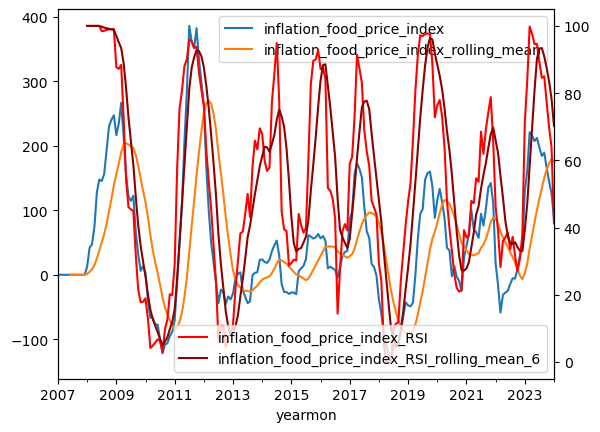

In [160]:

ax = price_anomaly_final[price_anomaly_final['region']=='Garissa'].groupby(['yearmon'])[['inflation_food_price_index','inflation_food_price_index_rolling_mean']].mean().plot()
ax1 = ax.twinx()
price_anomaly_final[price_anomaly_final['region']=='Garissa'].groupby(['yearmon'])[['inflation_food_price_index_RSI']].mean().plot(ax = ax1, color = 'red')
price_anomaly_final[price_anomaly_final['region']=='Garissa'].groupby(['yearmon'])[['inflation_food_price_index_RSI_rolling_mean_6']].mean().plot(ax = ax1, color = 'darkred')


<AxesSubplot:label='7fae1802-3387-4890-875a-7049ef005cdf', xlabel='yearmon'>

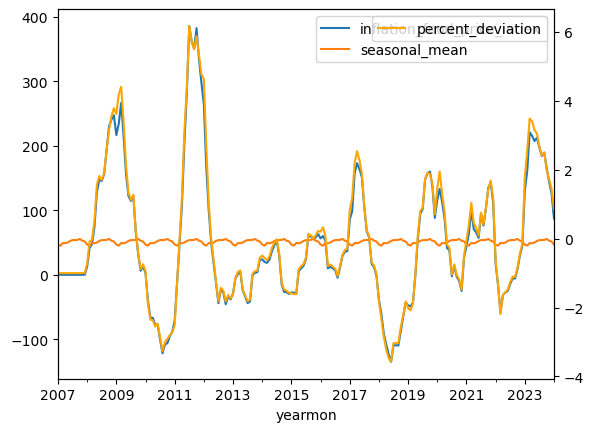

In [169]:
ax = price_anomaly_final[price_anomaly_final['region']=='Garissa'].groupby(['yearmon'])[['inflation_food_price_index','seasonal_mean']].mean().plot()
ax1 = ax.twinx()

price_anomaly_final[price_anomaly_final['region']=='Garissa'].groupby(['yearmon'])[['percent_deviation']].mean().plot(ax = ax1, color = 'orange')

<AxesSubplot:label='9a84d25d-2b08-4288-a7cc-a027b43aae89', xlabel='yearmon'>

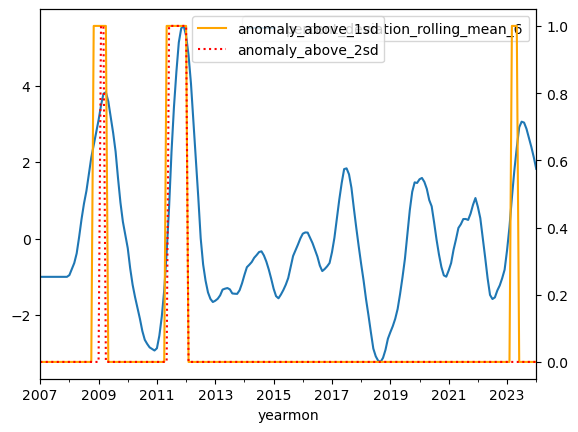

In [170]:
ax = price_anomaly_final[price_anomaly_final['region']=='Garissa'].groupby(['yearmon'])[['percent_deviation_rolling_mean_6']].mean().plot()
ax1 = ax.twinx()

price_anomaly_final[price_anomaly_final['region']=='Garissa'].groupby(['yearmon'])[['anomaly_above_1sd']].mean().plot(ax = ax1, color = 'orange')
price_anomaly_final[price_anomaly_final['region']=='Garissa'].groupby(['yearmon'])[['anomaly_above_2sd']].mean().plot(ax = ax1, color = 'red', linestyle=':')


In [175]:
kenya_ipc_acled_price_df = kenya_ipc_acled_df.merge(price_anomaly_final[['yearmon','region']+[t for t in price_anomaly_final if 'inflation_food' in t]+
                                                                        [t for t in price_anomaly_final if 'anomaly' in t] +
                                                                        [t for t in price_anomaly_final if 'percent_deviation' in t] +
                                                                        ['zscore_anomaly']],
                                          left_on = ['region','yearmon'], 
                                          right_on = ['region','yearmon'], how = 'left')#[['fatalities_total_rolling_mean_3','p3plus_percentage']].corr()


In [176]:
kenya_ipc_acled_price_df.to_csv(home+r'\\stores\\processed\\ipc_price_acled_kenya.csv')

## Haiti

In [179]:
c_name = 'Haiti'
# 1. Ensure both GeoDataFrames use the same CRS
price_sub_df = key_price_sub_df[key_price_sub_df['country']==c_name]

#Change duplicates name
print('ipc unique # of district:', haiti_ipc_acled_df['adm1_name'].nunique())
print('price unique # of adm1:', price_sub_df['adm1_name'].nunique())


ipc unique # of district: 10
price unique # of adm1: 9


In [180]:
print(sorted(price_sub_df['adm1_name'].unique()))
print('\n')
print('Target Names: \n', sorted(haiti_ipc_acled_df['adm1_name'].unique()))


['Artibonite', 'Centre', "Grande'Anse", 'North', 'North-East', 'North-West', 'South', 'South-East', 'West']


Target Names: 
 ['Artibonite', 'Centre', 'Grande-Anse', 'Nippes', 'Nord', 'Nord-Est', 'Nord-Ouest', 'Ouest', 'Sud', 'Sud-Est']


In [181]:
# Kenya
haiti_region_map = {
    'Artibonite': 'Artibonite',
    'Centre': 'Centre',
    "Grande'Anse": 'Grande-Anse',
    'North': 'Nord',
    'North-East': 'Nord-Est',
    'North-West': 'Nord-Ouest',
    'South': 'Sud',
    'South-East': 'Sud-Est',
    'West': 'Ouest'
}


price_sub_df['region'] = price_sub_df['adm1_name'].map(haiti_region_map)

C:\Users\ck24\AppData\Local\Temp\ipykernel_52244\2050170680.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_sub_df['region'] = price_sub_df['adm1_name'].map(haiti_region_map)


In [185]:
# Agg acled at country level
price_anomaly_final = price_sub_df.groupby(['yearmon','region']).sum().reset_index().copy()

# This will hold minimal processed outputs to be merged later
processed_dfs = []


for target_var in [t for t in price_df_final if 'inflation_food' in t]:
    # Minimal subset to avoid working on full frame
    #temp_df = acled_df_final[base_cols + [target_var]].copy()

    # Add rolling means and anomalies
    price_anomaly_final = calculate_seasonal_food_inflation_anomaly(price_anomaly_final, unit_col='region', date_col='yearmon', inflation_col = target_var)
    # Minimal subset to avoid working on full frame
    #temp_df = acled_df_final[base_cols + [target_var]].copy()

    # Add rolling means and anomalies
    price_anomaly_final = add_rsi(price_anomaly_final, target_var, unit_col='region', date_col='yearmon')
    price_anomaly_final = add_rolling_mean(price_anomaly_final, target_var+'_RSI', unit_col='region', date_col='yearmon')
    price_anomaly_final = add_rolling_mean(price_anomaly_final, 'percent_deviation', unit_col='region', date_col='yearmon')
    price_anomaly_final = add_rolling_anomalies_dev(price_anomaly_final, value_col=target_var, unit_col='region', date_col='yearmon')

    

In [186]:
haiti_ipc_acled_price_df = haiti_ipc_acled_df.merge(price_anomaly_final[['yearmon','region']+[t for t in price_anomaly_final if 'inflation_food' in t]+
                                                                        [t for t in price_anomaly_final if 'anomaly' in t] +
                                                                        [t for t in price_anomaly_final if 'percent_deviation' in t] +
                                                                        ['zscore_anomaly']],
                                          left_on = ['region','yearmon'], 
                                          right_on = ['region','yearmon'], how = 'left')#[['fatalities_total_rolling_mean_3','p3plus_percentage']].corr()


<AxesSubplot:label='98b0e224-7b45-4be6-acb0-dd6116e4af80', xlabel='yearmon'>

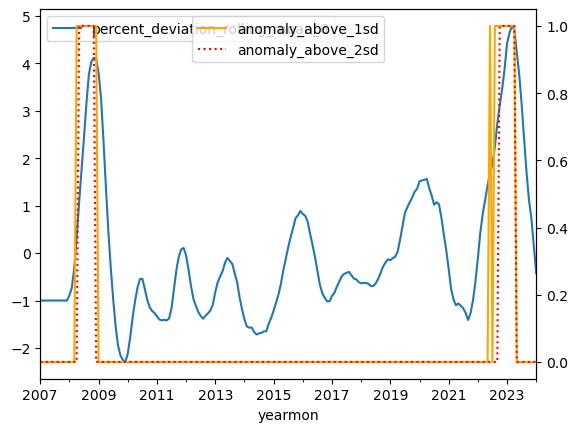

In [188]:
ax = price_anomaly_final[price_anomaly_final['region']=='Artibonite'].groupby(['yearmon'])[['percent_deviation_rolling_mean_6']].mean().plot()
ax1 = ax.twinx()

price_anomaly_final[price_anomaly_final['region']=='Artibonite'].groupby(['yearmon'])[['anomaly_above_1sd']].mean().plot(ax = ax1, color = 'orange')
price_anomaly_final[price_anomaly_final['region']=='Artibonite'].groupby(['yearmon'])[['anomaly_above_2sd']].mean().plot(ax = ax1, color = 'red', linestyle=':')


In [189]:
haiti_ipc_acled_price_df.to_csv(home+r'\\stores\\processed\\ipc_price_acled_haiti.csv')

## Afghanistan

In [190]:
c_name = 'Afghanistan'
# 1. Ensure both GeoDataFrames use the same CRS
price_sub_df = key_price_sub_df[key_price_sub_df['country']==c_name]

#Change duplicates name
print('ipc unique # of district:', afg_ipc_acled_df['adm1_name'].nunique())
print('price unique # of adm1:', price_sub_df['adm1_name'].nunique())


ipc unique # of district: 34
price unique # of adm1: 34


In [191]:
print(sorted(price_sub_df['adm1_name'].unique()))
print('\n')
print('Target Names: \n', sorted(afg_ipc_acled_df['adm1_name'].unique()))


['Badakhshan', 'Badghis', 'Baghlan', 'Balkh', 'Bamyan', 'Daykundi', 'Farah', 'Faryab', 'Ghazni', 'Ghor', 'Hilmand', 'Hirat', 'Jawzjan', 'Kabul', 'Kandahar', 'Kapisa', 'Khost', 'Kunar', 'Kunduz', 'Laghman', 'Logar', 'Nangarhar', 'Nimroz', 'Nuristan', 'Paktika', 'Paktya', 'Panjsher', 'Parwan', 'Samangan', 'Sar-e-pul', 'Takhar', 'Uruzgan', 'Wardak', 'Zabul']


Target Names: 
 ['Badakhshan', 'Badghis', 'Baghlan', 'Balkh', 'Bamyan', 'Daykundi', 'Farah', 'Faryab', 'Ghazni', 'Ghor', 'Helmand', 'Herat', 'Jowzjan', 'Kabul', 'Kandahar', 'Kapisa', 'Khost', 'Kunar', 'Kunduz', 'Laghman', 'Logar', 'Nangarhar', 'Nimruz', 'Nuristan', 'Paktia', 'Paktika', 'Panjshir', 'Parwan', 'Samangan', 'Sar-e Pol', 'Takhar', 'Urozgan', 'Wardak', 'Zabul']


In [192]:
# Kenya
province_mapping = {
    'Badakhshan': 'Badakhshan',
    'Badghis': 'Badghis',
    'Baghlan': 'Baghlan',
    'Balkh': 'Balkh',
    'Bamyan': 'Bamyan',
    'Daykundi': 'Daykundi',
    'Farah': 'Farah',
    'Faryab': 'Faryab',
    'Ghazni': 'Ghazni',
    'Ghor': 'Ghor',
    'Hilmand': 'Helmand',
    'Hirat': 'Herat',
    'Jawzjan': 'Jowzjan',
    'Kabul': 'Kabul',
    'Kandahar': 'Kandahar',
    'Kapisa': 'Kapisa',
    'Khost': 'Khost',
    'Kunar': 'Kunar',
    'Kunduz': 'Kunduz',
    'Laghman': 'Laghman',
    'Logar': 'Logar',
    'Nangarhar': 'Nangarhar',
    'Nimroz': 'Nimruz',
    'Nuristan': 'Nuristan',
    'Paktika': 'Paktika',
    'Paktya': 'Paktia',
    'Panjsher': 'Panjshir',
    'Parwan': 'Parwan',
    'Samangan': 'Samangan',
    'Sar-e-pul': 'Sar-e Pol',
    'Takhar': 'Takhar',
    'Uruzgan': 'Urozgan',
    'Wardak': 'Wardak',
    'Zabul': 'Zabul'
}



price_sub_df['region'] = price_sub_df['adm1_name'].map(province_mapping)

C:\Users\ck24\AppData\Local\Temp\ipykernel_52244\722342601.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_sub_df['region'] = price_sub_df['adm1_name'].map(province_mapping)


In [197]:
# Agg acled at country level
price_anomaly_final = price_sub_df.groupby(['yearmon','region']).sum().reset_index().copy()

# This will hold minimal processed outputs to be merged later
processed_dfs = []


for target_var in [t for t in price_df_final if 'inflation_food' in t]:
    # Minimal subset to avoid working on full frame
    #temp_df = acled_df_final[base_cols + [target_var]].copy()

    # Add rolling means and anomalies
    price_anomaly_final = calculate_seasonal_food_inflation_anomaly(price_anomaly_final, unit_col='region', date_col='yearmon', inflation_col = target_var)
    # Minimal subset to avoid working on full frame
    #temp_df = acled_df_final[base_cols + [target_var]].copy()

    # Add rolling means and anomalies
    price_anomaly_final = add_rsi(price_anomaly_final, target_var, unit_col='region', date_col='yearmon')
    price_anomaly_final = add_rolling_mean(price_anomaly_final, target_var+'_RSI', unit_col='region', date_col='yearmon')
    price_anomaly_final = add_rolling_mean(price_anomaly_final, 'percent_deviation', unit_col='region', date_col='yearmon')
    price_anomaly_final = add_rolling_anomalies_dev(price_anomaly_final, value_col=target_var, unit_col='region', date_col='yearmon')

    

In [198]:
afg_ipc_acled_price_df = afg_ipc_acled_df.merge(price_anomaly_final[['yearmon','region']+[t for t in price_anomaly_final if 'inflation_food' in t]+
                                                                        [t for t in price_anomaly_final if 'anomaly' in t] +
                                                                        [t for t in price_anomaly_final if 'percent_deviation' in t] +
                                                                        ['zscore_anomaly']],
                                          left_on = ['region','yearmon'], 
                                          right_on = ['region','yearmon'], how = 'left')#[['fatalities_total_rolling_mean_3','p3plus_percentage']].corr()


<AxesSubplot:label='89046fac-5113-42cf-a1e9-4625e659df83', xlabel='yearmon'>

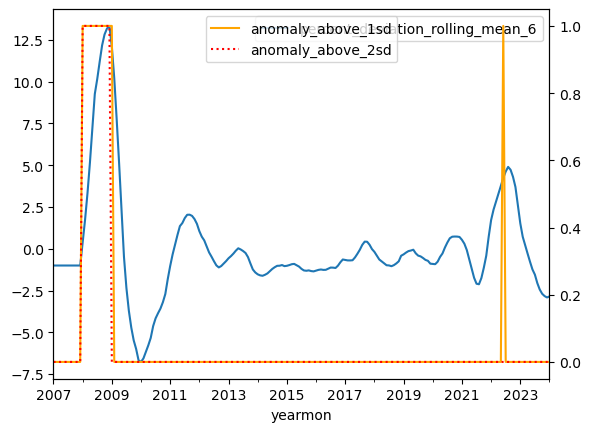

In [200]:
ax = price_anomaly_final[price_anomaly_final['region']=='Badakhshan'].groupby(['yearmon'])[['percent_deviation_rolling_mean_6']].mean().plot()
ax1 = ax.twinx()

price_anomaly_final[price_anomaly_final['region']=='Badakhshan'].groupby(['yearmon'])[['anomaly_above_1sd']].mean().plot(ax = ax1, color = 'orange')
price_anomaly_final[price_anomaly_final['region']=='Badakhshan'].groupby(['yearmon'])[['anomaly_above_2sd']].mean().plot(ax = ax1, color = 'red', linestyle=':')


In [201]:
afg_ipc_acled_price_df.to_csv(home+r'\\stores\\processed\\ipc_price_acled_afg.csv')

In [8]:
from functools import reduce
from shapely.geometry import Point

In [12]:
#Load ACLED Entire DF
acled_df_final = pd.read_csv('C:\\Users\\ck24\\OneDrive - University of Illinois - Urbana\\Documents\\FoodSecurityIPC\\stores\\conflict_df.csv')

In [10]:
from utils import (
    add_time_lags,
    add_seasonal_anomalies,
    add_rolling_means,
    add_rolling_anomalies,
    add_rolling_lag_means,
)

In [166]:
print('Subset following countries', key_countries)
key_acled_sub_df = acled_df_final[acled_df_final['country'].isin(key_countries)]


# Assuming your DataFrame is called df and has 'lat' and 'lon' columns
# (If your column names are different, replace them accordingly)
#acled_sub_df['geometry'] = acled_sub_df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Convert to GeoDataFrame
#acled_sub_gdf = gpd.GeoDataFrame(acled_sub_df, geometry='geometry', crs='EPSG:4326')  # WGS84 lat/lon projection

Subset following countries ['Afghanistan', 'Haiti', 'Kenya']


In [167]:
#key_country_ipc_df = key_country_ipc_df.to_crs(epsg=4326)
#key_acled_sub_gdf = key_acled_sub_gdf.to_crs(epsg=4326)

In [ ]:
acled_anomaly_final = add_rolling_mean(acled_anomaly_final, target_var+'_RSI', unit_col='adm1_name', date_col='yearmon')

# Load GeoDF to merge ACLED Data with geocoded

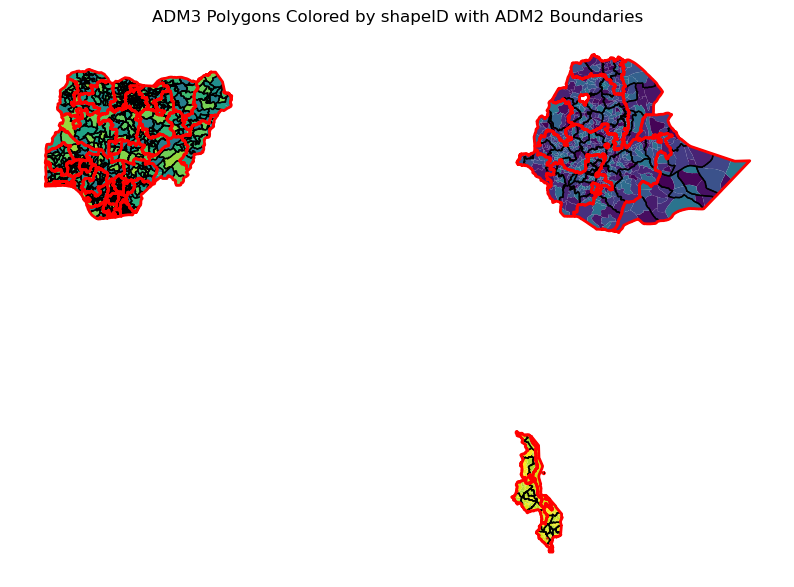

In [311]:
# Load shapefile I seperated created using goolge colab
geo_df = gpd.read_file(home+r"\stores\final_geo_df.shp")

# Create plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot ADM3 polygons filled by shapeID
geo_df.plot(
    column='shapeID', 
    cmap='viridis', 
    ax=ax, 
    edgecolor='none', 
    legend=False
)

# Overlay ADM2 boundaries
geo_df.dissolve(by='adm2_name').boundary.plot(
    ax=ax, 
    color='black', 
    linewidth=1
)

# Overlay ADM2 boundaries
geo_df.dissolve(by='adm1_name').boundary.plot(
    ax=ax, 
    color='red', 
    linewidth=2
)

# Optional cleanup
ax.set_title("ADM3 Polygons Colored by shapeID with ADM2 Boundaries", fontsize=12)
ax.set_axis_off()
plt.show()

In [71]:
load_dotenv(dotenv_path=home+r"\openai_key.env")

True

In [72]:
import openai
# Load from .env
load_dotenv(dotenv_path=home+r"\openai_key.env")
openai_key = os.getenv("openai")
openai_key

NameError: name 'geo_home' is not defined

In [465]:
# Load country_codes
with open(home+r"\stores\country_codes.json", "r") as f:
    country_map = json.load(f)
country_map

{'Afghanistan': 'AFG',
 'Bangladesh': 'BGD',
 'Pakistan': 'PAK',
 'Timor-Leste': 'TLS',
 'Burundi': 'BDI',
 'Central African Republic': 'CAF',
 'Congo, DRC': 'COD',
 'Djibouti': 'DJI',
 'Ethiopia': 'ETH',
 'Kenya': 'KEN',
 'Somalia': 'SOM',
 'South Sudan': 'SSD',
 'Sudan': 'SDN',
 'Tanzania': 'TZA',
 'Uganda': 'UGA',
 'Angola': 'AGO',
 'Eswatini': 'SWZ',
 'Lesotho': 'LSO',
 'Madagascar': 'MDG',
 'Malawi': 'MWI',
 'Mozambique': 'MOZ',
 'Namibia': 'NAM',
 'Nigeria': 'NGA',
 'South Africa': 'ZAF',
 'Zambia': 'ZMB',
 'Zimbabwe': 'ZWE',
 'Dominican Republic': 'DOM',
 'El Salvador': 'SLV',
 'Guatemala': 'GTM',
 'Haiti': 'HTI',
 'Honduras': 'HND',
 'LAC Region (tri-National)': 'LAC',
 'Lebanon': 'LBN',
 'Yemen': 'YEM'}

In [481]:
acled_df_final.to_csv(home +r'\stores\processed\acled_df_final.csv')

In [417]:
import geopandas as gpd
from shapely.geometry import Point

# Step 1: Create Point geometries from latitude and longitude
acled_df_final['geometry'] = acled_df_final.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Step 2: Convert to GeoDataFrame
acled_geo_df_final = gpd.GeoDataFrame(acled_df_final, geometry='geometry')

# Step 3: Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
acled_geo_df_final = acled_geo_df_final.set_crs(epsg=4326)

In [482]:
acled_df_final.groupby('country')['adm2_name'].nunique()

country
Ethiopia     78
Malawi       27
Nigeria     639
Name: adm2_name, dtype: int64

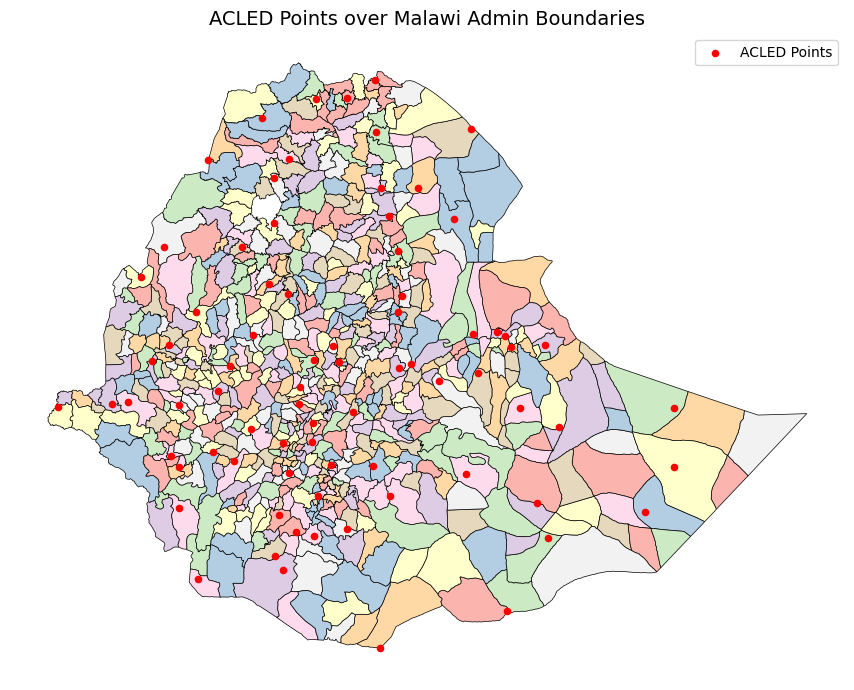

In [469]:
# Filter both GeoDataFrames for Malawi
country = 'Ethiopia'
poly = geo_df[geo_df['country'] == country_map[country]]
points = acled_geo_df_final[acled_geo_df_final['country'] == country].drop_duplicates(subset=['adm2_name'])

# Create plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot polygons (base map)
poly.plot(ax=ax, column='shapeID', cmap='Pastel1', edgecolor='black', linewidth=0.5)

# Plot points (overlaid)
points.plot(ax=ax, color='red', markersize=20, label='ACLED Points')

# Optional: Add legend and title
plt.title("ACLED Points over Malawi Admin Boundaries", fontsize=14)
plt.legend()
plt.axis('off')
plt.tight_layout()

plt.show()

In [431]:
# Ensure both GeoDataFrames have the same CRS
acled_geo_df_final = acled_geo_df_final.to_crs(geo_df.crs)

# Spatial join: match each point to the polygon it intersects
joined_df = gpd.sjoin(acled_geo_df_final, geo_df, how='left', op='intersects')

AttributeError: No geometry data set yet (expected in column 'geometry'.)

In [437]:
final_acled_geo_df = joined_df.merge(geo_df.rename(columns={'geometry': 'poly_geometry'}))
# Now replace the point geometry with polygon geometry
final_acled_geo_df['geometry'] = final_acled_geo_df['poly_geometry']
final_acled_geo_df = final_acled_geo_df.set_geometry('geometry').drop(columns=['poly_geometry', 'index_right'])

In [450]:
test_df = final_acled_geo_df.drop_duplicates(subset = ['adm1_name_left','adm2_name_left'])

In [455]:
geo_df.groupby('country')['shapeID'].nunique()

country
ETH    690
MWI    245
NGA    774
Name: shapeID, dtype: int64

In [454]:
final_acled_geo_df.groupby('country')['shapeID'].nunique()

country
ETH    339
MWI     47
NGA    647
Name: shapeID, dtype: int64

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

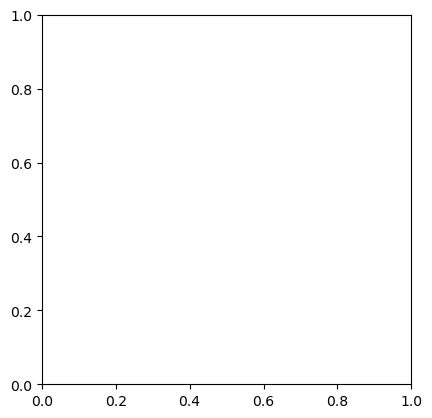

In [444]:
final_acled_geo_df.drop_duplicates(subset = ['adm1_name','adm2_name']).plot(column = 'geometry')

In [402]:
import difflib



country = 'Ethiopia'
country_match = {'Malawi':'adm2_name',
                  'Nigeria':'adm1_name',
                  'Ethiopia':'adm2_name'}



acled_adm_name = acled_df_final[acled_df_final['country']==country][country_match[country]].unique().tolist()
target_name = geo_df[geo_df['country']==country_map[country]][country_match[country]].unique().tolist()

# Creating a dictionary to match original names to the closest in new names
matched_names = {}

for name in target_name:
    closest_match = difflib.get_close_matches(name, acled_adm_name, n=1, cutoff=0.80)
    if closest_match:
        matched_names[name] = closest_match[0]
    else:
        matched_names[name] = None

unmatched = {k for k, v in matched_names.items() if v is None}

# Left is Target Geo DF and right is ACLED Name
print('# of target names (GEODF): ', len(target_name), '\n',
      '# of acled names (Acled): ', len(acled_adm_name), '\n',
      '# of matched names (Matched Names): ', len(matched_names) - len(unmatched), '\n')

sorted_dict = dict(sorted(matched_names.items()))
sorted_dict

# of target names (GEODF):  74 
 # of acled names (Acled):  78 
 # of matched names (Matched Names):  46 



{'Afder': 'Afder',
 'Agnuak': None,
 'Alaba': None,
 'Arsi': 'Arsi',
 'Asosa': 'Asosa',
 'Awi/Agew': None,
 'Bale': 'Bale',
 'Basketo': None,
 'Bench Maji': None,
 'Borena': 'Borena',
 'Central': None,
 'Dawro': None,
 'Dire Dawa': None,
 'Doolo': 'Doolo',
 'East Gojam': 'East Gojam',
 'East Harerge': 'East Hararge',
 'East Shewa': 'East Shewa',
 'East Wellega': 'East Wellega',
 'Eastern': None,
 'Fafan': 'Fafan',
 'Gamo Gofa': None,
 'Gedio': 'Gedeo',
 'Guji': 'Guji',
 'Gurage': 'Guraghe',
 'Hadiya': 'Hadiya',
 'Hareri': 'Harari',
 'Horo Guduru': None,
 'Ilubabor': None,
 'Jarar': 'Jarar',
 'Jimma': 'Jimma',
 'KT': None,
 'Keffa': 'Kefa',
 'Kelem Wellega': 'Kellem Wollega',
 'Kemashi': 'Kemashi',
 'Konta': None,
 'Korahe': 'Korahe',
 'Liben': 'Liban',
 'Majang': None,
 'Metekel': 'Metekel',
 'Nogob': 'Nogob',
 'North Gonder': 'North Gondar',
 'North Shewa(R3)': 'North Shewa',
 'North Shewa(R4)': 'North Shewa',
 'North Western': None,
 'North Wollo': 'North Wello',
 'Nuer': 'Nuwer',
 '

In [404]:
# Unmatched Target Names
print('Unmatched Target Names(from GeoDF):', sorted(unmatched), '\n')
print('ACLED names:', sorted(acled_adm_name))

Unmatched Target Names(from GeoDF): ['Agnuak', 'Alaba', 'Awi/Agew', 'Basketo', 'Bench Maji', 'Central', 'Dawro', 'Dire Dawa', 'Eastern', 'Gamo Gofa', 'Horo Guduru', 'Ilubabor', 'KT', 'Konta', 'Majang', 'North Western', "Segen Peoples'", 'Selti', 'Southern', 'Special Woreda', 'Wag Himra', 'Western', 'Yem', 'Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5'] 

ACLED names: ['Afder', 'Agnewak', 'Amaro', 'Arsi', 'Asosa', 'Awi', 'Awsi-Zone 1', 'Bale', 'Bench Sheko', 'Borena', 'Buno Bedele', 'Central Gondar', 'Central Tigray', 'Daawa', 'Dire Dawa rural', 'Dire Dawa urban', 'Doolo', 'East Bale', 'East Gojam', 'East Hararge', 'East Shewa', 'East Wellega', 'Eastern Tigray', 'Erer', 'Fafan', 'Fanti-Zone 4', 'Finfine Special', 'Gabi-Zone 3', 'Gamo', 'Gedeo', 'Guji', 'Guraghe', 'Hadiya', 'Halaba', 'Harari', 'Horo Gudru Wellega', 'Ilu Aba Bora', 'Itang Special woreda', 'Jarar', 'Jimma', 'Kefa', 'Kellem Wollega', 'Kemashi', 'Kilbati-Zone 2', 'Konso', 'Konta Special', 'Korahe', 'Liban', 'Mekelle Tigray

In [408]:
# Replace with your OpenAI key
openai.api_key = openai_key

# Format dictionary for review
dict_text = json.dumps(matched_names, indent=2)

# Prompt for matching
prompt = (
    "You are a helpful assistant.\n"
    "Below is a list of known correct district names:\n"
    f"{acled_adm_name}\n\n"
    "Please match each of the following unmatched district names to the most similar correct name "
    "from the list above, if a close match exists. If a match cannot be confidently found, return null.\n\n"
    f"Unmatched district names:\n{unmatched}\n\n"
    "Return your answer as a JSON dictionary where the keys are the unmatched names, and the values are either the matched correct names or null. "
    "Output only the dictionary, with no additional explanation or formatting."
)


# Call OpenAI API
response = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[{"role": "user", "content": prompt}],
    temperature=0
)



In [409]:
import ast

content = response.choices[0].message["content"]

# Step 1: Strip outer quotes if present
if content.startswith("'") and content.endswith("'"):
    content = content[1:-1]
content = content.replace("null", "None")

# Step 2: Use ast.literal_eval to safely parse
try:
    matches = ast.literal_eval(content)
    print("✅ Parsed entries:")
    print(matches)
except Exception as e:
    print("⚠️ Failed to parse response as dictionary.")
    print("Raw output:\n", content)


✅ Parsed entries:
{'Western': 'Western Tigray', 'Wag Himra': None, 'Zone 1': 'Awsi-Zone 1', 'Horo Guduru': 'Horo Gudru Wellega', 'Dawro': None, 'Ilubabor': None, 'Agnuak': 'Agnewak', 'Majang': None, 'Gamo Gofa': 'Gamo', 'Basketo': None, 'Zone 5': None, 'Central': 'Central Gondar', 'KT': None, 'Zone 4': 'Fanti-Zone 4', 'Special Woreda': 'Itang Special woreda', 'Zone 3': 'Gabi-Zone 3', 'Southern': 'Southern Tigray', "Segen Peoples'": None, 'Selti': 'Siltie', 'Yem': None, 'Awi/Agew': 'Awi', 'Bench Maji': 'Bench Sheko', 'North Western': 'North Western Tigray', 'Eastern': 'Eastern Tigray', 'Konta': 'Konta Special', 'Zone 2': 'Kilbati-Zone 2', 'Alaba': 'Halaba', 'Dire Dawa': 'Dire Dawa urban'}


In [413]:
gpt_unmatched = {k for k, v in matches.items() if v is None}
print('GPT-Unmatched Target Names(from GeoDF):', sorted(gpt_unmatched), '\n')
print('ACLED names:', sorted(acled_adm_name))

GPT-Unmatched Target Names(from GeoDF): ['Basketo', 'Dawro', 'Ilubabor', 'KT', 'Majang', "Segen Peoples'", 'Wag Himra', 'Yem', 'Zone 5'] 

ACLED names: ['Afder', 'Agnewak', 'Amaro', 'Arsi', 'Asosa', 'Awi', 'Awsi-Zone 1', 'Bale', 'Bench Sheko', 'Borena', 'Buno Bedele', 'Central Gondar', 'Central Tigray', 'Daawa', 'Dire Dawa rural', 'Dire Dawa urban', 'Doolo', 'East Bale', 'East Gojam', 'East Hararge', 'East Shewa', 'East Wellega', 'Eastern Tigray', 'Erer', 'Fafan', 'Fanti-Zone 4', 'Finfine Special', 'Gabi-Zone 3', 'Gamo', 'Gedeo', 'Guji', 'Guraghe', 'Hadiya', 'Halaba', 'Harari', 'Horo Gudru Wellega', 'Ilu Aba Bora', 'Itang Special woreda', 'Jarar', 'Jimma', 'Kefa', 'Kellem Wollega', 'Kemashi', 'Kilbati-Zone 2', 'Konso', 'Konta Special', 'Korahe', 'Liban', 'Mekelle Tigray', 'Metekel', 'Mirab Omo', 'Nogob', 'North Gondar', 'North Shewa', 'North Wello', 'North Western Tigray', 'Nuwer', 'Oromia', 'Region 14', 'Shabelle', 'Sheka', 'Sidama', 'Siltie', 'Siti', 'South Gondar', 'South Omo', 'Sou

In [378]:
# Update only non-null entries from matched_names2 into matched_names
for key, value in matches.items():
    if value is not None:
        matched_names[key] = value
matched_names

{'Chitipa': 'Chitipa',
 'Mangochi': 'Mangochi',
 'Dedza': 'Dedza',
 'Salima': 'Salima',
 'Nkhotakota': 'Nkhotakota',
 'Nkhata Bay': 'Nkhata Bay',
 'Rumphi': 'Rumphi',
 'Karonga': 'Karonga',
 'Area under National Administration': None,
 'Phalombe': None,
 'Zomba': 'Zomba City',
 'Mulanje': 'Mulanje',
 'Thyolo': 'Thyolo',
 'Mzimba': 'Mzimba',
 'Kasungu': 'Kasungu',
 'Ntchisi': None,
 'Dowa': 'Dowa',
 'Mchinji': 'Mchinji',
 'Lilongwe': 'Lilongwe',
 'Ntcheu': 'Ntcheu',
 'Machinga': 'Machinga',
 'Balaka': 'Balaka',
 'Neno': 'Neno',
 'Mwanza': 'Mwanza',
 'Chiradzulu': 'Chiradzulu',
 'Blantyre': 'Blantyre',
 'Chikwawa': 'Chikwawa',
 'Nsanje': 'Nsanje',
 'Likoma': None}

In [379]:
mwi_matched_names = matched_names.copy()

In [364]:
nga_matched_names = matched_names.copy()

In [365]:
nga_matched_names

{'Akwa Ibom': 'Akwa Ibom',
 'Bayelsa': 'Bayelsa',
 'Rivers': 'Rivers',
 'Cross River': 'Cross River',
 'Oyo': 'Oyo',
 'Ogun': 'Ogun',
 'Ondo': 'Ondo',
 'Delta': 'Delta',
 'Taraba': 'Taraba',
 'Adamawa': 'Adamawa',
 'Osun': 'Osun',
 'Enugu': 'Enugu',
 'Ebonyi': 'Ebonyi',
 'Kwara': 'Kwara',
 'Kogi': 'Kogi',
 'Yobe': 'Yobe',
 'Abuja': 'Federal Capital Territory',
 'Zamfara': 'Zamfara',
 'Kano': 'Kano',
 'Kebbi': 'Kebbi',
 'Sokoto': 'Sokoto',
 'Jigawa': 'Jigawa',
 'Bauchi': 'Bauchi',
 'Edo': 'Edo',
 'Kaduna': 'Kaduna',
 'Katsina': 'Katsina',
 'Borno': 'Borno',
 'Gombe': 'Gombe',
 'Lagos': 'Lagos',
 'Niger': 'Niger',
 'Ekiti': 'Ekiti',
 'Anambra': 'Anambra',
 'Benue': 'Benue',
 'Abia': 'Abia',
 'Imo': 'Imo',
 'Nassarawa': 'Nassarawa',
 'Plateau': 'Plateau'}

In [301]:
import ast  # safer than eval for trusted literal input

content = response.choices[0].message["content"]

try:
    suspicious_matches = ast.literal_eval(content)
    print("✅ Parsed suspicious entries:")
    print(suspicious_matches)
except Exception as e:
    print("⚠️ Failed to parse response as dictionary.")
    print("Raw output:\n", content)

✅ Parsed suspicious entries:
{'Abuja': 'Federal Capital Territory'}


In [302]:
suspicious_matches

{'Abuja': 'Federal Capital Territory'}

In [287]:
unmatched = {k for k, v in content.items() if v is null}

AttributeError: 'str' object has no attribute 'items'

In [288]:
content

'{\n  "Eastern Obolo": "Eastern Obolo",\n  "Ekeremor": "Ekermor",\n  "Degema": "Degema",\n  "Andoni": "Andoni",\n  "Akpabuyo": "Akpabuyo",\n  "Oron": "Oron",\n  "Calabar Municipal": "Calabar Municipal",\n  "Udung Uko": "Udung Uko",\n  "Southern Ijaw": "Southern Ijaw",\n  "Iwajowa": null,\n  "Ibarapa North": "Ibarapa North",\n  "Bonny": "Bonny",\n  "Imeko-Afon": "Imeko-Afon",\n  "Ibeno": "Ibeno",\n  "Nembe": "Nembe",\n  "Ilaje": "Ilaje",\n  "Brass": "Brass",\n  "Warri North": "Warri North",\n  "Ese-Odo": "Ese-Edo",\n  "Ardo-Kola": "Ardo Kola",\n  "Burutu": "Burutu",\n  "Gombi": "Gombi",\n  "Yorro": "Yorro",\n  "Yola North": "Yola-North",\n  "Demsa": "Demsa",\n  "Mbo": "Mbo",\n  "Lau": "Lau",\n  "Ibarapa Central": "Ibarapa Central",\n  "Abeokuta North": "Abeokuta North",\n  "Warri South-West": "Warri South-West",\n  "Warri South": "Warri South",\n  "Isokan": "Isokan",\n  "Irewole": null,\n  "Essien Udim": "Essien Udim",\n  "Onna": "Onna",\n  "Udenu": "Udenu",\n  "Enugu South": "Enugu Sou

In [286]:
print(content)

{
  "Eastern Obolo": "Eastern Obolo",
  "Ekeremor": "Ekermor",
  "Degema": "Degema",
  "Andoni": "Andoni",
  "Akpabuyo": "Akpabuyo",
  "Oron": "Oron",
  "Calabar Municipal": "Calabar Municipal",
  "Udung Uko": "Udung Uko",
  "Southern Ijaw": "Southern Ijaw",
  "Iwajowa": null,
  "Ibarapa North": "Ibarapa North",
  "Bonny": "Bonny",
  "Imeko-Afon": "Imeko-Afon",
  "Ibeno": "Ibeno",
  "Nembe": "Nembe",
  "Ilaje": "Ilaje",
  "Brass": "Brass",
  "Warri North": "Warri North",
  "Ese-Odo": "Ese-Edo",
  "Ardo-Kola": "Ardo Kola",
  "Burutu": "Burutu",
  "Gombi": "Gombi",
  "Yorro": "Yorro",
  "Yola North": "Yola-North",
  "Demsa": "Demsa",
  "Mbo": "Mbo",
  "Lau": "Lau",
  "Ibarapa Central": "Ibarapa Central",
  "Abeokuta North": "Abeokuta North",
  "Warri South-West": "Warri South-West",
  "Warri South": "Warri South",
  "Isokan": "Isokan",
  "Irewole": null,
  "Essien Udim": "Essien Udim",
  "Onna": "Onna",
  "Udenu": "Udenu",
  "Enugu South": "Enugu South",
  "Ikot Ekpene": "Ikot Ekpene",
 

In [33]:
# Filter unique rows
acled_geo_df = acled_df_final[acled_df_final['country']=='Malawi']

# Create geometry from latitude and longitude
acled_geo_df['geometry'] = acled_geo_df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Convert to GeoDataFrame
acled_geo_df = gpd.GeoDataFrame(acled_geo_df, geometry='geometry', crs="EPSG:4326")

C:\Users\ck24\AppData\Local\Temp\ipykernel_56560\1858497454.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acled_geo_df['geometry'] = acled_geo_df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)


In [34]:
sjoin_to_find_closest = gpd.sjoin(geo_df[geo_df['shapeName'].isin(unmatched)], acled_geo_df[['geometry','adm2_name']], how = 'left', op='within')
sjoin_to_find_closest['adm2_name_right'].values.tolist()

[]

# Earth Observation

In [220]:
# Set directory
directory = os.path.join(home, 'stores', 'processed')
csv_files = glob.glob(os.path.join(directory, '*.csv'))[:-1]

# Base merge columns
base_var = ['country', 'shapeGroup', 'shapeID', 'shapeName', 'shapeType', 'year', 'month']

# Initialize final merged DataFrame
merged_df = None

for f in csv_files:
    subdf = pd.read_csv(f).rename(columns={'admin1': 'adm1_name', 'admin2': 'adm2_name'})
    var_name = f.split('\\')[-1].split('_')[0]

    if 'mean' in subdf.columns:
        # Keep only base_var and the renamed mean column
        subdf = subdf[base_var + ['mean']].copy()
        subdf = subdf.rename(columns={'mean': var_name})
    else:
        print(f"{var_name}: no 'mean' column found, keeping all columns.")
        # Optionally, rename the columns to avoid collisions
        subdf.columns = [f"{col}" if col not in base_var else col for col in subdf.columns]

    # Merge
    if merged_df is None:
        merged_df = subdf
    else:
        merged_df = pd.merge(merged_df, subdf, on=base_var, how='outer')

# Add year_month datetime column
merged_df['year_month'] = pd.to_datetime(merged_df[['year', 'month']].assign(day=1))

# Result
merged_df


modis: no 'mean' column found, keeping all columns.


country shapeGroup                  shapeID     shapeName shapeType  \
0          NGA        NGA  59680162B74485110483501     Itesiwaju      ADM2   
1          NGA        NGA  59680162B64506251287847        Kajola      ADM2   
2          NGA        NGA  59680162B79793295224635    Nkanu West      ADM2   
3          NGA        NGA  59680162B68024378624756  Afikpo North      ADM2   
4          NGA        NGA  59680162B72688070781247         Donga      ADM2   
...        ...        ...                      ...           ...       ...   
430663     ETH        ETH   50319843B5964560944788         Esira      ADM3   
430664     ETH        ETH  50319843B99173318035572    Sodo Zuria      ADM3   
430665     ETH        ETH  50319843B32669148569770    Loka Abaya      ADM3   
430666     ETH        ETH  50319843B33186421674041    Arbe Gonna      ADM3   
430667     ETH        ETH  50319843B92512686412360           Ofa      ADM3   

        year  month          evi  Clear_day_cov  Clear_night_cov  ...  \
0       2000      2  1861.330711    2652.672552      2427.111467  ...   
1       2000      2  1774.918640    2230.995214      2221.192056  ...   
2       2000      2  2448.518874    2122.965545      2364.561166  ...   
3       2000      2  2490.943650    1948.249526      2092.477818  ...   
4       2000      2  1769.378908    1981.130209      2165.094470  ...   
...      ...    ...          ...            ...              ...  ...   
430663  2000      1          NaN            NaN              NaN  ...   
430664  2000      1          NaN            NaN              NaN  ...   
430665  2000      1          NaN            NaN              NaN  ...   
430666  2000      1          NaN            NaN              NaN  ...   
430667  2000      1          NaN            NaN              NaN  ...   

         QC_Night  adm1_name     adm2_name  orig_area  shapeISO  chunk  \
0       32.463801        Oyo     Itesiwaju   0.141101       NaN    3.0   
1       22.961167        Oyo        Kajola   0.052184       NaN    3.0   
2        8.219748      Enugu    Nkanu West   0.018985       NaN    3.0   
3        6.621469     Ebonyi  Afikpo North   0.021232       NaN    3.0   
4       18.872296     Taraba         Donga   0.253396       NaN    3.0   
...           ...        ...           ...        ...       ...    ...   
430663        NaN        NaN           NaN        NaN       NaN    NaN   
430664        NaN        NaN           NaN        NaN       NaN    NaN   
430665        NaN        NaN           NaN        NaN       NaN    NaN   
430666        NaN        NaN           NaN        NaN       NaN    NaN   
430667        NaN        NaN           NaN        NaN       NaN    NaN   

               ndvi      prep      spei  year_month  
0       3769.818698  0.000000 -1.525220  2000-02-01  
1       3396.179624  0.083779 -1.543684  2000-02-01  
2       3985.372782  0.000501 -2.554383  2000-02-01  
3       4125.016288  0.213264 -2.708020  2000-02-01  
4       3378.689578  0.000080 -0.841383  2000-02-01  
...             ...       ...       ...         ...  
430663          NaN  0.293382 -1.918636  2000-01-01  
430664          NaN  0.314417 -1.190357  2000-01-01  
430665          NaN  0.335865 -1.344204  2000-01-01  
430666          NaN  0.404883 -1.639279  2000-01-01  
430667          NaN  0.348626 -1.174927  2000-01-01  

[430668 rows x 29 columns]

In [221]:
def convert_modis_lst_to_celsius(lst_array):
    """
    Convert MODIS LST (e.g., LST_Day_1km or LST_Night_1km) to Celsius.
    
    Parameters:
    -----------
    lst_array : np.ndarray
        Input array containing raw MODIS LST values (scaled integers).

    Returns:
    --------
    np.ndarray
        Array of temperature in Celsius with invalid values masked as np.nan.
    """
    # Initialize output array with NaNs
    lst_celsius = np.full_like(lst_array, np.nan, dtype=np.float32)

    # Define valid range (exclude fill values: 0, 32767)
    valid = (lst_array > 7500) & (lst_array < 65535)

    # Apply conversion: scale factor 0.02, convert to Celsius
    lst_celsius[valid] = (lst_array[valid] * 0.02) - 273.15

    return lst_celsius

In [222]:
merged_df['daytime_temp_C'] = convert_modis_lst_to_celsius(merged_df['LST_Day_1km'])
merged_df['nighttime_temp_C'] = convert_modis_lst_to_celsius(merged_df['LST_Night_1km'])

In [237]:
var = ['evi', 'prep', 'spei', 'daytime_temp_C', 'nighttime_temp_C', 'ndvi']
v = var[4]
print(v)

# Step 2: Compute the group means
group_means = merged_df.groupby(['country', 'shapeID', 'year_month'])[v].mean()
print(group_means.head())

# Step 3: Filter for NaN group means
nan_groups = group_means[group_means.isna()]
nan_index = nan_groups.index

# Step 4: Safely filter original DataFrame
if len(nan_index) == 0:
    print(f"No NaN group means found for variable '{v}'")
    filtered_nan_df = pd.DataFrame()  # or `None`, depending on your use case
else:
    filtered_nan_df = merged_df.set_index(['country', 'shapeID', 'year_month']).loc[nan_index].reset_index()
    print(set(filtered_nan_df['year_month'].unique()))




nighttime_temp_C
country  shapeID                  year_month
ETH      50319843B10181001606973  2000-01-01          NaN
                                  2000-02-01    10.024131
                                  2000-03-01    11.576074
                                  2000-04-01    10.642961
                                  2000-05-01    11.542057
Name: nighttime_temp_C, dtype: float32
{numpy.datetime64('2000-01-01T00:00:00.000000000'), numpy.datetime64('2012-07-01T00:00:00.000000000'), numpy.datetime64('2004-09-01T00:00:00.000000000'), numpy.datetime64('2002-07-01T00:00:00.000000000'), numpy.datetime64('2003-06-01T00:00:00.000000000'), numpy.datetime64('2006-07-01T00:00:00.000000000'), numpy.datetime64('2008-06-01T00:00:00.000000000'), numpy.datetime64('2009-07-01T00:00:00.000000000'), numpy.datetime64('2013-07-01T00:00:00.000000000'), numpy.datetime64('2013-08-01T00:00:00.000000000'), numpy.datetime64('2015-07-01T00:00:00.000000000'), numpy.datetime64('2007-12-01T00:00:00.000000000

<AxesSubplot:xlabel='year_month'>

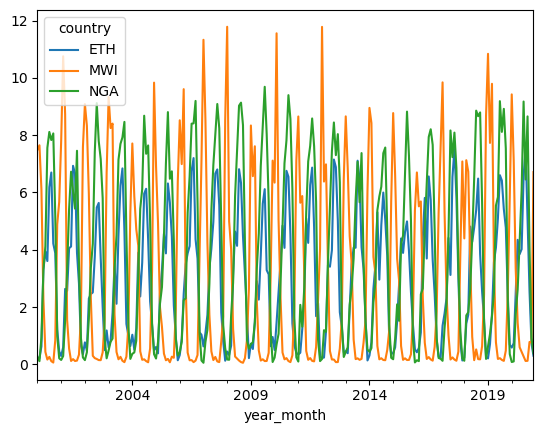

In [238]:
merged_df.groupby(['year_month','country'])['prep'].mean().unstack().plot()

In [239]:
for target_var in ['evi','prep','spei','daytime_temp_C','nighttime_temp_C','ndvi']:
    # Minimal subset to avoid working on full frame
    #temp_df = acled_df_final[base_cols + [target_var]].copy()

    # Add rolling means and anomalies
    merged_df = add_rolling_means(merged_df, target_var, unit_col='shapeID', date_col='year_month')
    merged_df = add_rolling_anomalies(merged_df, value_col=target_var, unit_col='shapeID', date_col='year_month')

In [241]:
merged_df[['adm1_name','adm2_name','shapeID','year_month','evi','prep','spei','daytime_temp_C','nighttime_temp_C','ndvi']].sort_values(by = ['shapeID','year_month'])

adm1_name adm2_name                  shapeID year_month  \
430154              NaN       NaN  50319843B10181001606973 2000-01-01   
1095             Amhara  Awi/Agew  50319843B10181001606973 2000-02-01   
2704             Amhara  Awi/Agew  50319843B10181001606973 2000-03-01   
4513             Amhara  Awi/Agew  50319843B10181001606973 2000-04-01   
6122             Amhara  Awi/Agew  50319843B10181001606973 2000-05-01   
...                 ...       ...                      ...        ...   
420779  Southern Region  Machinga   60268647B9941577632844 2020-08-01   
422188  Southern Region  Machinga   60268647B9941577632844 2020-09-01   
424197  Southern Region  Machinga   60268647B9941577632844 2020-10-01   
425906  Southern Region  Machinga   60268647B9941577632844 2020-11-01   
427315  Southern Region  Machinga   60268647B9941577632844 2020-12-01   

                evi      prep      spei  daytime_temp_C  nighttime_temp_C  \
430154          NaN  0.377144 -1.994046             NaN               NaN   
1095    1853.319705  0.443310 -2.119421       39.504059         10.024131   
2704    1820.230356  0.630155 -2.826889       41.002243         11.576074   
4513    2115.981430  4.235997  0.574230       36.571548         10.642961   
6122    2788.167988  4.215821  1.724212       29.792994         11.542057   
...             ...       ...       ...             ...               ...   
420779  1712.293298  0.186646  0.446794       32.618271         16.147442   
422188  1505.976698  0.108702 -0.350162       38.813812         19.187721   
424197  1497.665676  0.542131 -0.371966       43.937298         21.205036   
425906  1585.466208  0.597571 -1.746806       45.309235         23.462261   
427315  2718.186953  6.243828 -0.591448       36.831532         20.676737   

               ndvi  
430154          NaN  
1095    3240.030335  
2704    3153.454100  
4513    3683.903114  
6122    4919.648325  
...             ...  
420779  3364.178403  
422188  2967.087913  
424197  2812.747445  
425906  2796.210453  
427315  4365.451740  

[430668 rows x 10 columns]

1. merge merged_df with geo_df
2. merge ACLEAD with GEO_DF by ADM2 Name
3. Merge Price with GEO_DF by ADM2 Name

4. Link final data with LSMS Run regression

<AxesSubplot:>

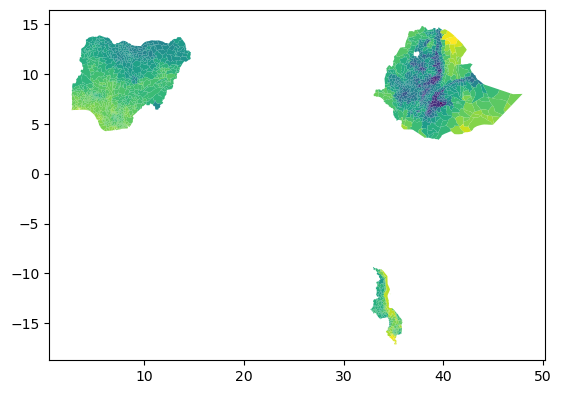

In [264]:
eo_geo_df = geo_df.merge(merged_df[['adm1_name','adm2_name','shapeID','year_month','evi','prep','spei','daytime_temp_C','nighttime_temp_C','ndvi']], on = ['shapeID','adm1_name','adm2_name'])
type(eo_geo_df)

eo_geo_df.drop_duplicates(subset = ['shapeID'], keep = 'last').plot(column = 'nighttime_temp_C')

In [484]:
eo_geo_df.to_csv(home +r'\stores\processed\eo_geo_df.csv')